# Time Series Sales Forecasting

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = pd.read_csv('sales_dataset.csv')
df.head()

Order Date Region Customer Segment Product Category  Units Sold  \
0  2021-01-01 0:00:00   East   Small Business      Electronics           9   
1  2021-01-01 1:00:00   West   Small Business      Electronics          27   
2  2021-01-01 2:00:00  North   Small Business  Office Supplies          41   
3  2021-01-01 3:00:00   East         Consumer      Electronics          14   
4  2021-01-01 4:00:00   East   Small Business      Electronics          45   

   Unit Price   Revenue  Profit Margin  
0      153.73   1383.57           0.07  
1      289.07   7804.89           0.13  
2      491.73  20160.93           0.11  
3      116.57   1631.98           0.11  
4      493.09  22189.05           0.21

In [3]:
# bottom 5 records
df.tail()

Order Date Region Customer Segment Product Category  \
9995  2022-02-21 11:00:00   West   Small Business      Electronics   
9996  2022-02-21 12:00:00   East   Small Business      Electronics   
9997  2022-02-21 13:00:00  South        Corporate  Office Supplies   
9998  2022-02-21 14:00:00  South         Consumer      Electronics   
9999  2022-02-21 15:00:00  North        Corporate  Office Supplies   

      Units Sold  Unit Price   Revenue  Profit Margin  
9995          39      472.50  18427.50           0.15  
9996          19      467.94   8890.86           0.29  
9997          38      186.47   7085.86           0.10  
9998          23      182.43   4195.89           0.15  
9999          16      281.90   4510.40           0.21

In [4]:
# dimensionality of the data
df.shape

(10000, 8)

## Data preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Date        10000 non-null  object 
 1   Region            10000 non-null  object 
 2   Customer Segment  10000 non-null  object 
 3   Product Category  10000 non-null  object 
 4   Units Sold        10000 non-null  int64  
 5   Unit Price        10000 non-null  float64
 6   Revenue           10000 non-null  float64
 7   Profit Margin     10000 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


In [6]:
df.describe()

Units Sold    Unit Price       Revenue  Profit Margin
count  10000.000000  10000.000000  10000.000000   10000.000000
mean      25.060400    252.609973   6339.533679       0.174601
std       14.103909    140.594368   5391.484434       0.072439
min        1.000000     10.000000     12.620000       0.050000
25%       13.000000    130.525000   1885.335000       0.110000
50%       25.000000    253.225000   4801.040000       0.170000
75%       37.000000    371.992500   9662.000000       0.240000
max       49.000000    499.900000  24381.910000       0.300000

 1. Units Sold -
 - count: data contain 10000 records
 - mean : the average , 25.06 units are sold per transaction
 - stadard deviation : the number of units sold varies by 14.10 units
 - minimum, maximum : smallest sale contain 1 unit , largest sale contain 49 unit
 - quartiles : 25th,50th,75th percentile contain 13,25,37 unit sales involved
   
 2. unit price -
 - mean : the average unit price is 252.61$
 - standard deviation : prices widey vary as 140.59$
 - minumum, maximum : lowest unit price is 10$ and highest price is 499.9$
 - quartiles : 25th,50th,75th percentile contain unit prices are 130.52$, 253.22$, 371.99$

 3. revenue -
 - mean : the average sales revenue is 6339.53$
 - standard deviation : revenue vary deviation is 5391.48$
 - minimum, maximum : revenue ranges from 12.62$ to 24,381.91$
 - quartiles : 25th,50th,75th percentile contain revenues are 1885.34$, 4801.04$,9662$

 4. profit margin((profit/revenue)*100) :
 - mean : the average profit margin is 17.46%
 - standard deviation : profit margin varies by 7.24%
 - minimum, maximum : profit margin ranges from 5% to 30%
 - quartiles : 25th,50th,75th percentiles are 11%,17%,24%
   

In [7]:
# check the missing data
df.isna().sum()

Order Date          0
Region              0
Customer Segment    0
Product Category    0
Units Sold          0
Unit Price          0
Revenue             0
Profit Margin       0
dtype: int64

In [8]:
# check the duplicates
df.duplicated().sum()

np.int64(0)

### the data set no duplicates and no null values

In [9]:
# total cost and profit calculations
df['Profit'] = df['Revenue'] * df['Profit Margin']
df['Costs'] = df['Revenue'] - df['Profit']

df = df.round({'Profit':2, 'Costs':2})
df.head(3)

Order Date Region Customer Segment Product Category  Units Sold  \
0  2021-01-01 0:00:00   East   Small Business      Electronics           9   
1  2021-01-01 1:00:00   West   Small Business      Electronics          27   
2  2021-01-01 2:00:00  North   Small Business  Office Supplies          41   

   Unit Price   Revenue  Profit Margin   Profit     Costs  
0      153.73   1383.57           0.07    96.85   1286.72  
1      289.07   7804.89           0.13  1014.64   6790.25  
2      491.73  20160.93           0.11  2217.70  17943.23

In [10]:
# check Profit or loss
def PorL(x):
   if x >= 0:
       return 'Profit'
   else:
      return 'Loss'
df['Profit/Loss'] = df['Profit'].apply(PorL)
df.head()

Order Date Region Customer Segment Product Category  Units Sold  \
0  2021-01-01 0:00:00   East   Small Business      Electronics           9   
1  2021-01-01 1:00:00   West   Small Business      Electronics          27   
2  2021-01-01 2:00:00  North   Small Business  Office Supplies          41   
3  2021-01-01 3:00:00   East         Consumer      Electronics          14   
4  2021-01-01 4:00:00   East   Small Business      Electronics          45   

   Unit Price   Revenue  Profit Margin   Profit     Costs Profit/Loss  
0      153.73   1383.57           0.07    96.85   1286.72      Profit  
1      289.07   7804.89           0.13  1014.64   6790.25      Profit  
2      491.73  20160.93           0.11  2217.70  17943.23      Profit  
3      116.57   1631.98           0.11   179.52   1452.46      Profit  
4      493.09  22189.05           0.21  4659.70  17529.35      Profit

In [11]:
# count the number of 'Profit' and 'Loss' labels
profit_loss_counts = df['Profit/Loss'].value_counts()
print(profit_loss_counts)

# percentage distribution
profit_loss_percent = profit_loss_counts / len(df) * 100
print('Percentage Distribution:')
print(profit_loss_percent)

Profit/Loss
Profit    10000
Name: count, dtype: int64
Percentage Distribution:
Profit/Loss
Profit    100.0
Name: count, dtype: float64


In [12]:
# convert to pandas datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# extract the year,month,quarter
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Quarter'] = df['Order Date'].dt.quarter

In [13]:
df.head()

Order Date Region Customer Segment Product Category  Units Sold  \
0 2021-01-01 00:00:00   East   Small Business      Electronics           9   
1 2021-01-01 01:00:00   West   Small Business      Electronics          27   
2 2021-01-01 02:00:00  North   Small Business  Office Supplies          41   
3 2021-01-01 03:00:00   East         Consumer      Electronics          14   
4 2021-01-01 04:00:00   East   Small Business      Electronics          45   

   Unit Price   Revenue  Profit Margin   Profit     Costs Profit/Loss  Year  \
0      153.73   1383.57           0.07    96.85   1286.72      Profit  2021   
1      289.07   7804.89           0.13  1014.64   6790.25      Profit  2021   
2      491.73  20160.93           0.11  2217.70  17943.23      Profit  2021   
3      116.57   1631.98           0.11   179.52   1452.46      Profit  2021   
4      493.09  22189.05           0.21  4659.70  17529.35      Profit  2021   

   Month Month_Name  Quarter  
0      1    January        1  
1      1    January        1  
2      1    January        1  
3      1    January        1  
4      1    January        1

## Exploratory Data Analysis

In [14]:
# summary statistics for categorical columns
df.describe(include=['object'])

Region Customer Segment Product Category Profit/Loss Month_Name
count   10000            10000            10000       10000      10000
unique      4                3                3           1         12
top     North         Consumer        Furniture      Profit    January
freq     2536             3355             3382       10000       1488

In [15]:
# summary statistics for numerical columns
df.describe(include=['float','integer'])

Units Sold    Unit Price       Revenue  Profit Margin        Profit  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean      25.060400    252.609973   6339.533679       0.174601   1108.404370   
std       14.103909    140.594368   5391.484434       0.072439   1114.769506   
min        1.000000     10.000000     12.620000       0.050000      1.550000   
25%       13.000000    130.525000   1885.335000       0.110000    273.365000   
50%       25.000000    253.225000   4801.040000       0.170000    726.750000   
75%       37.000000    371.992500   9662.000000       0.240000   1604.990000   
max       49.000000    499.900000  24381.910000       0.300000   6672.580000   

              Costs          Year         Month       Quarter  
count  10000.000000  10000.000000  10000.000000  10000.000000  
mean    5231.129324   2021.124000      5.890400      2.322400  
std     4489.173104      0.329598      3.646768      1.157667  
min       10.350000   2021.000000      1.000000      1.000000  
25%     1545.107500   2021.000000      2.000000      1.000000  
50%     3946.955000   2021.000000      6.000000      2.000000  
75%     7941.557500   2021.000000      9.000000      3.000000  
max    22610.850000   2022.000000     12.000000      4.000000

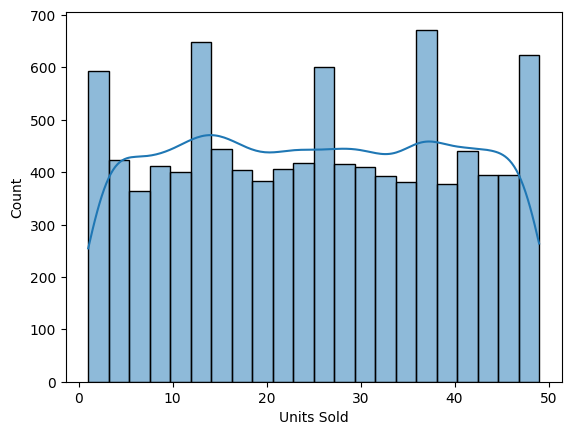

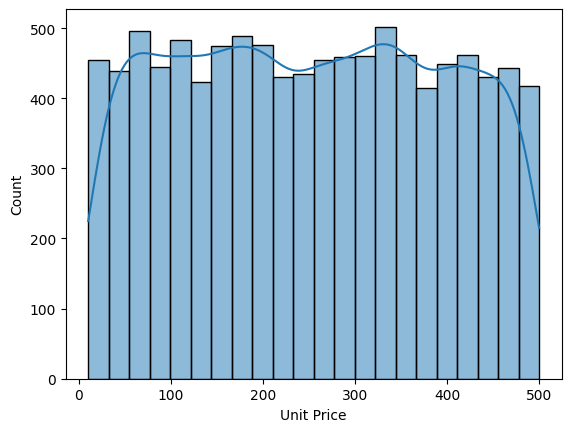

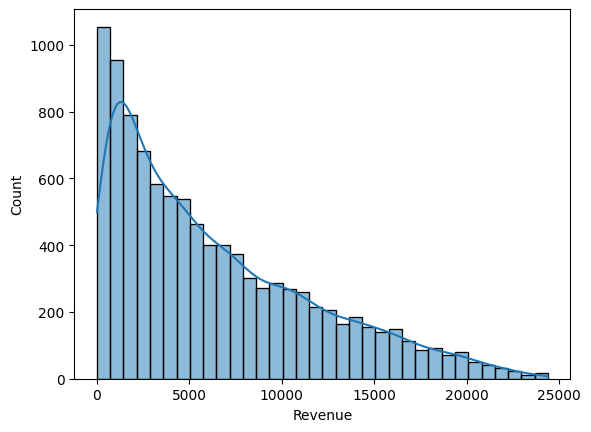

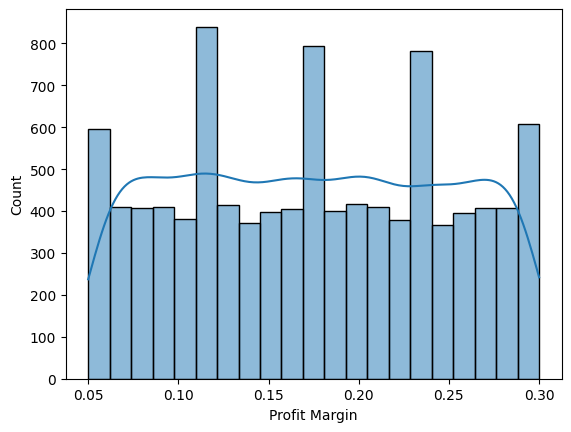

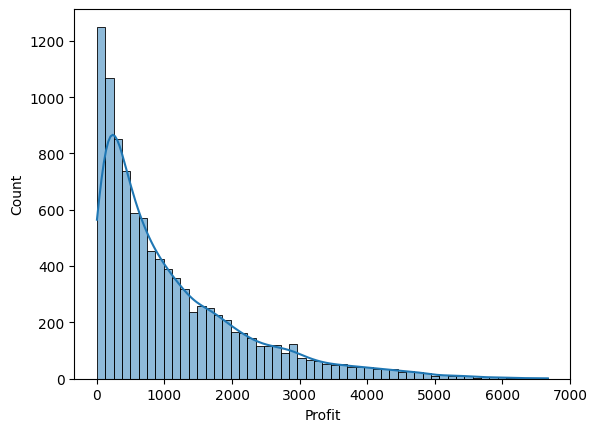

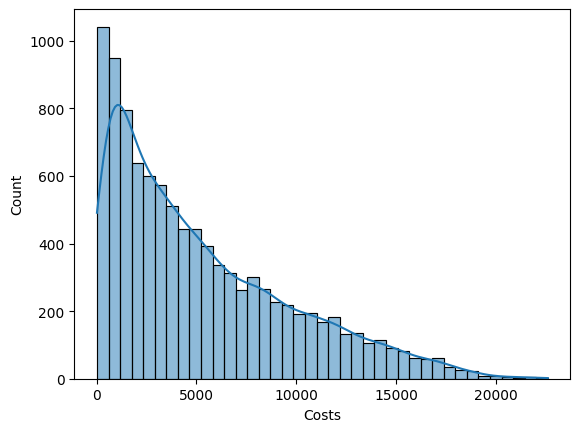

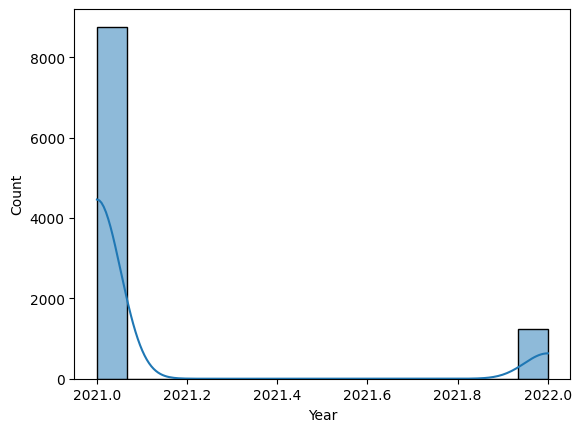

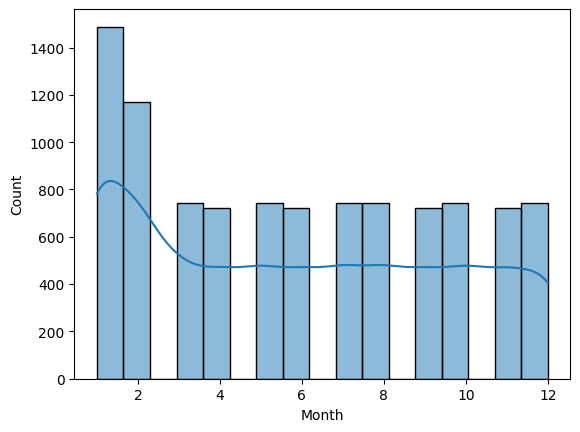

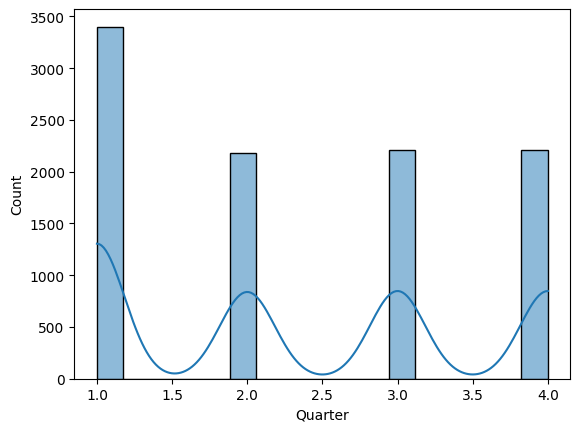

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# histogram distribution
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df, x=i ,kde=True)
    plt.show()

## Univariate Analysis

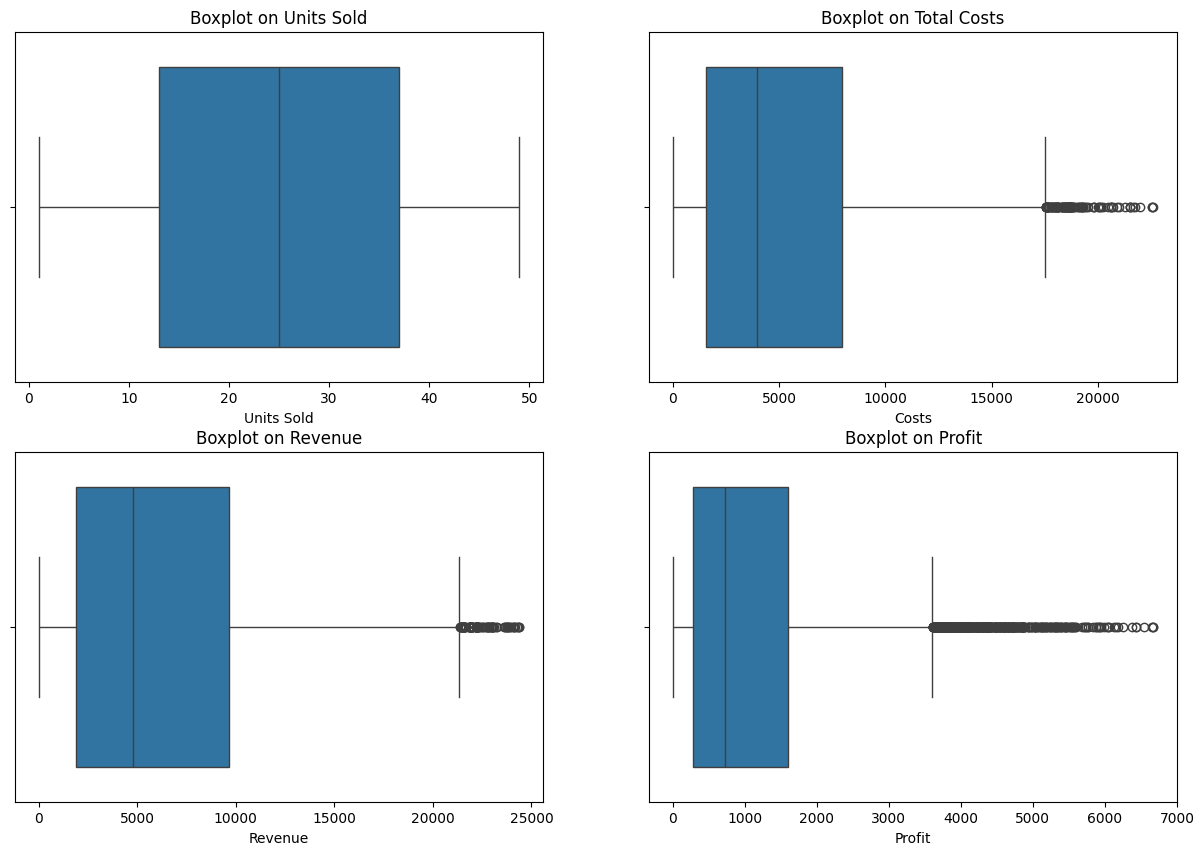

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(x="Units Sold", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Units Sold")

sns.boxplot(x="Costs", data=df, ax=axs[0,1])
axs[0,1].set_title("Boxplot on Total Costs")

sns.boxplot(x="Revenue", data=df, ax=axs[1,0])
axs[1,0].set_title("Boxplot on Revenue")

sns.boxplot(x="Profit", data=df, ax=axs[1,1])
axs[1,1].set_title("Boxplot on Profit");

1. boxplot on units sold distribution no skewness and data is symmetric
2. boxplot on total cost distribution slightly skewed so outliers there
3. boxplot on revenue distribution slightly skewed so outliers there
4. boxplot on profit distribution sightly skewed so outliers there

In [18]:
# Remove the outlier using IQR method

import pandas as pd

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df
    

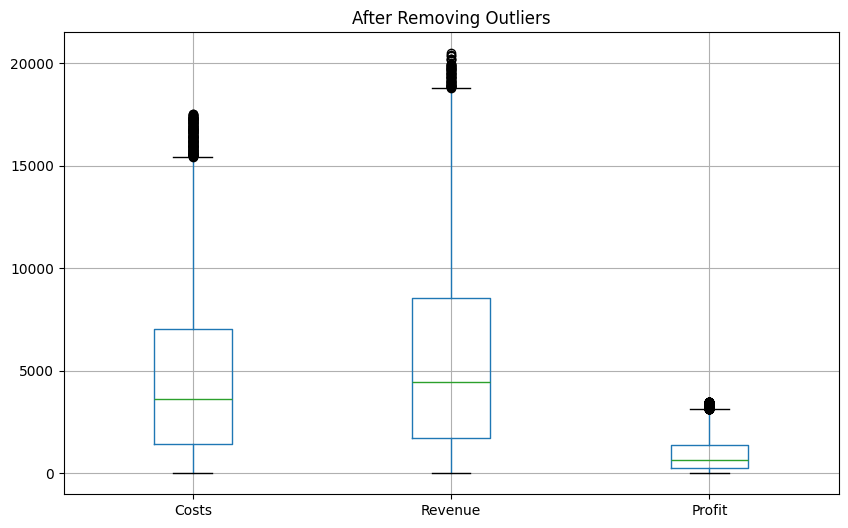

In [19]:
for col in ['Costs','Revenue','Profit']:
    df = remove_outliers_iqr(df, col)

import matplotlib.pyplot as plt
df[['Costs', 'Revenue', 'Profit']].boxplot(figsize=(10,6))
plt.title('After Removing Outliers')
plt.show()


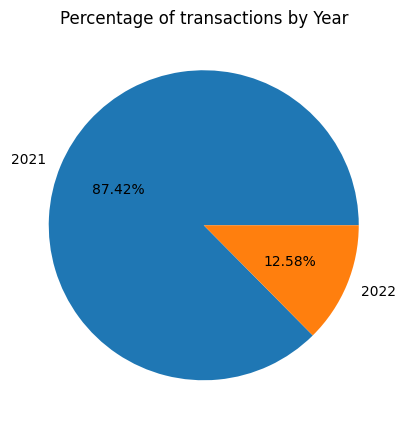

In [20]:
# total transaction by year
from collections import Counter
fig,ax = plt.subplots(figsize=(5,20))
count = Counter(df['Year'])
ax.pie(count.values(), labels=count.keys(),autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of transactions by Year')
plt.show()

### 2021 had more transations of 87.47% , compared to 2022 with 12.53%

[Text(0, 0, '3187'), Text(0, 0, '3125'), Text(0, 0, '3112')]

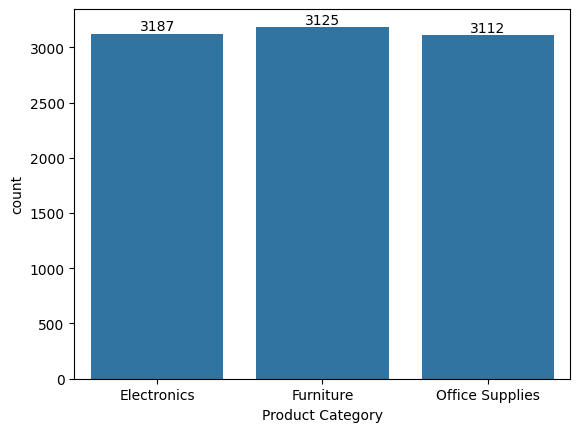

In [21]:
# check the transaction by product category
import seaborn as sns
ax = sns.countplot(x=df['Product Category'])
values = df['Product Category'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)

### above observation shows that Electronics sales more than other Products

[Text(0, 0, '3172'), Text(0, 0, '3161'), Text(0, 0, '3091')]

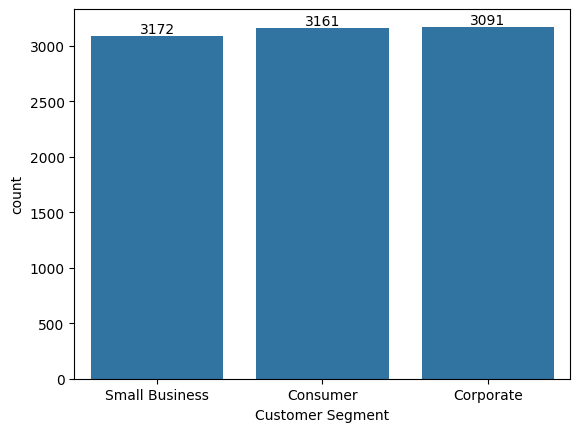

In [22]:
# check the transaction by Customer Segment
ax = sns.countplot(x=df['Customer Segment'])
values = df['Customer Segment'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)

### above observation shows that Small Business Customer Segment more than other Customer Segment 

[Text(0, 0, '2382'),
 Text(0, 0, '2362'),
 Text(0, 0, '2351'),
 Text(0, 0, '2329')]

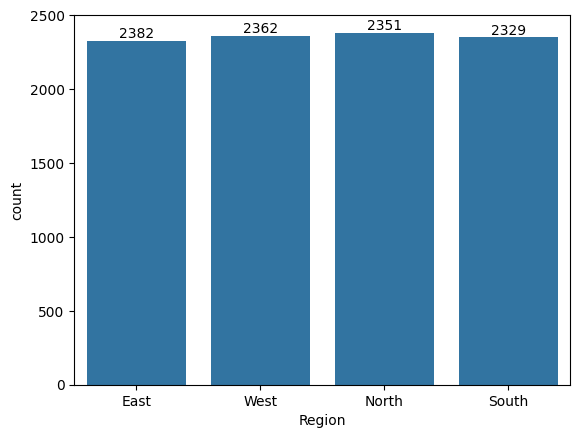

In [23]:
# check the transaction by Region
ax = sns.countplot(x=df['Region'])
values = df['Region'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)

### above observation shows that East Region transaction more than other Regionn

## Bivariate Analysis

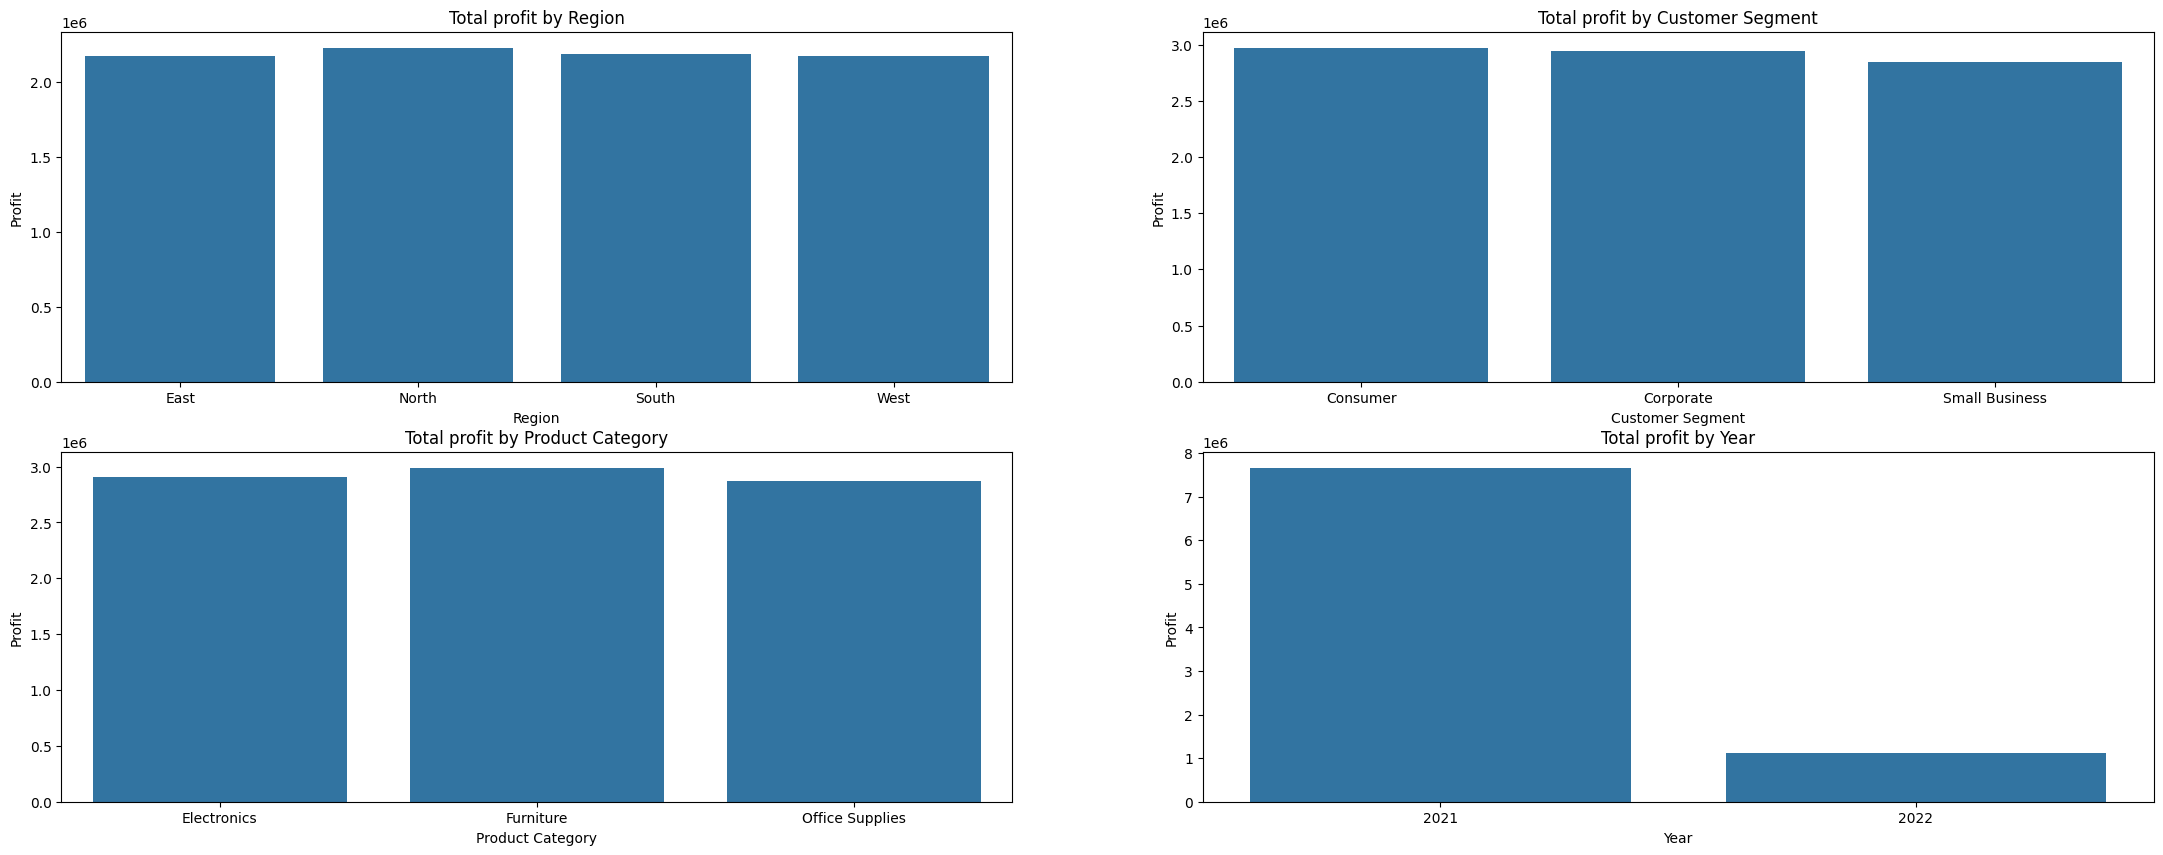

In [24]:
# Categorical Columns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(27,10))

Reg_prof = df.groupby("Region")["Profit"].sum().reset_index()
sns.barplot(x='Region', data=Reg_prof, y='Profit', ax=axs[0,0])
axs[0,0].set_title("Total profit by Region")

Cu_prof = df.groupby("Customer Segment")["Profit"].sum().reset_index()
sns.barplot(x='Customer Segment', data=Cu_prof, y='Profit', ax=axs[0,1])
axs[0,1].set_title("Total profit by Customer Segment")

Pr_prof = df.groupby("Product Category")["Profit"].sum().reset_index()
sns.barplot(x='Product Category', data=Pr_prof, y='Profit', ax=axs[1,0])
axs[1,0].set_title("Total profit by Product Category")

Yr_prof = df.groupby("Year")["Profit"].sum().reset_index()
sns.barplot(x='Year', data=Yr_prof, y='Profit', ax=axs[1,1])
axs[1,1].set_title("Total profit by Year");


In [25]:
df.columns

Index(['Order Date', 'Region', 'Customer Segment', 'Product Category',
       'Units Sold', 'Unit Price', 'Revenue', 'Profit Margin', 'Profit',
       'Costs', 'Profit/Loss', 'Year', 'Month', 'Month_Name', 'Quarter'],
      dtype='object')

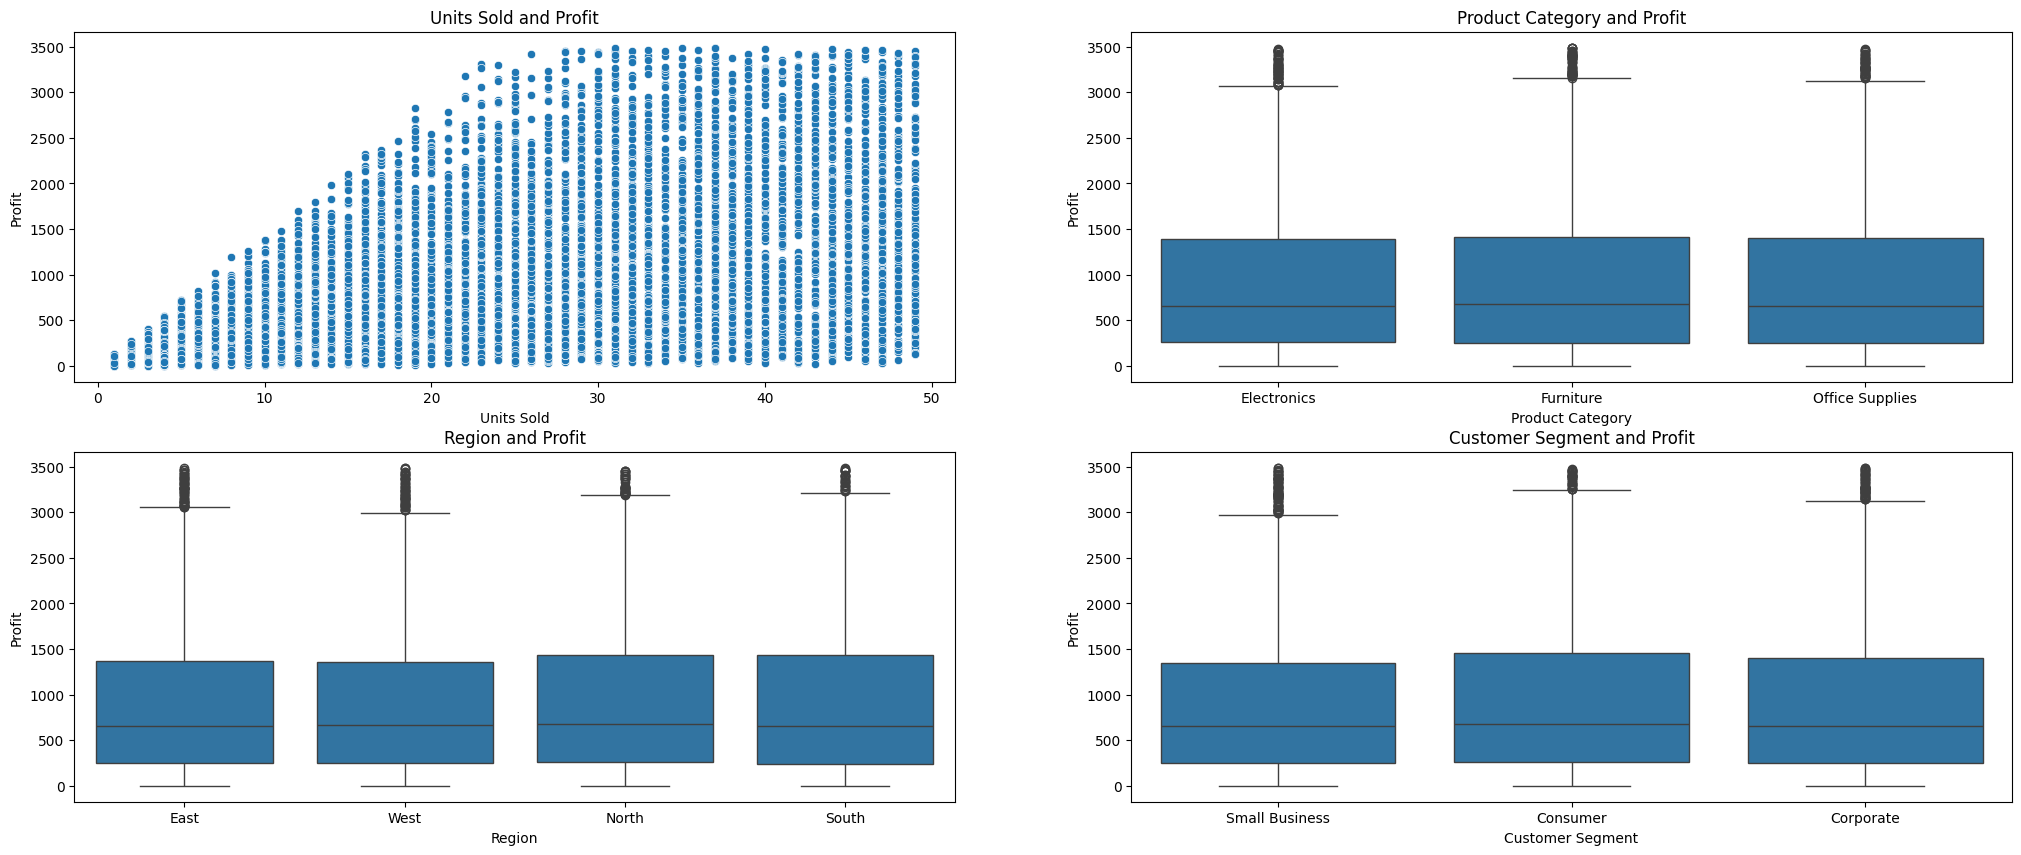

In [26]:
# Numerical Columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

sns.scatterplot(x='Units Sold', y='Profit', data=df, ax=axs[0,0])
axs[0,0].set_title("Units Sold and Profit")

sns.boxplot(x='Product Category', y='Profit', data=df, ax=axs[0,1])
axs[0,1].set_title("Product Category and Profit")

sns.boxplot(x='Region', y='Profit', data=df, ax=axs[1,0])
axs[1,0].set_title("Region and Profit")

sns.boxplot(x='Customer Segment', y='Profit', data=df, ax=axs[1,1])
axs[1,1].set_title("Customer Segment and Profit");

### Insights
#### Increase units sold most significant of profit, strong positive correlation
#### Electronics, Furniture, Office supplies product overall profit Equivalance
#### Region wise also Profit are Equivalance
#### In the customer segment Consumer profit higher than other customer

## Multivariate Analysis

In [27]:
# product category agains costs,revenue, profit
prod_cat = df.groupby('Product Category')[['Costs', 'Revenue','Profit']].sum().reset_index()

In [28]:
prod_cat

Product Category        Costs      Revenue      Profit
0      Electronics  14734766.59  17641135.85  2906369.33
1        Furniture  14907561.46  17891075.46  2983514.10
2  Office Supplies  14606255.76  17480594.86  2874339.09

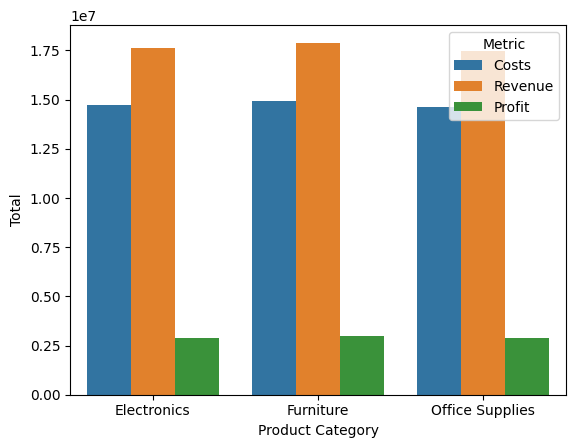

In [29]:
# visualise by product category

prod_cat = pd.melt(prod_cat, id_vars="Product Category", var_name="Metric", value_name="Total")
sns.barplot(data=prod_cat, x='Product Category', y="Total", hue="Metric");

### above graph shows that all categories show same metrics in regards the cost,revenue,profit

<Axes: xlabel='Customer Segment', ylabel='Total'>

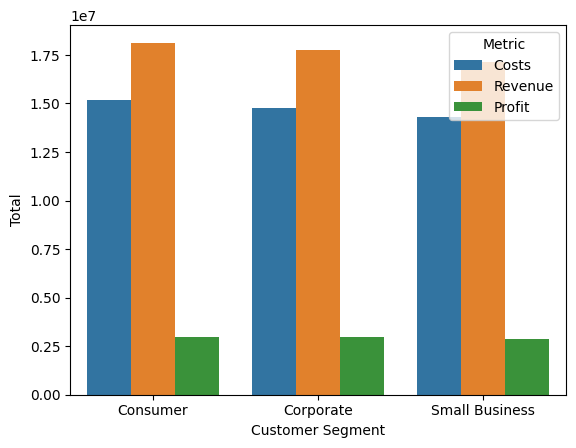

In [30]:
# lets visualise by customer segment
cust_seg = df.groupby('Customer Segment')[['Costs', 'Revenue','Profit']].sum().reset_index()
cust_seg = pd.melt(cust_seg, id_vars='Customer Segment', var_name='Metric', value_name='Total')
sns.barplot(data=cust_seg, x='Customer Segment', y='Total', hue='Metric')

## above graph shows that all customer segment show same metrics in regards the cost,revenue,profit

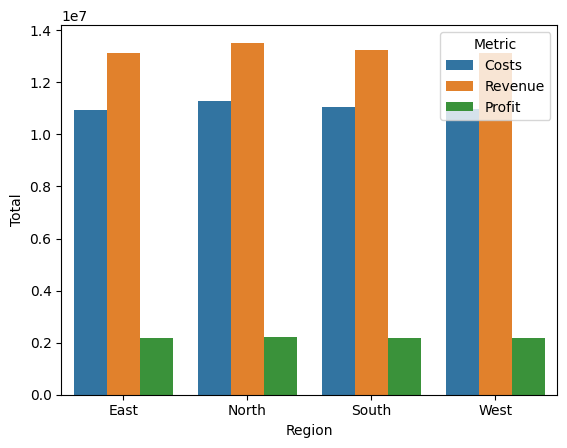

In [31]:
# Lets visualise by region

reg = df.groupby("Region")[["Costs", "Revenue", "Profit"]].sum().reset_index()
reg = pd.melt(reg, id_vars="Region", var_name="Metric", value_name="Total")
sns.barplot(data=reg, x='Region', y="Total", hue="Metric");

## above graph shows that all region show same metrics in regards the cost,revenue,profit

<Axes: xlabel='Month', ylabel='Profit'>

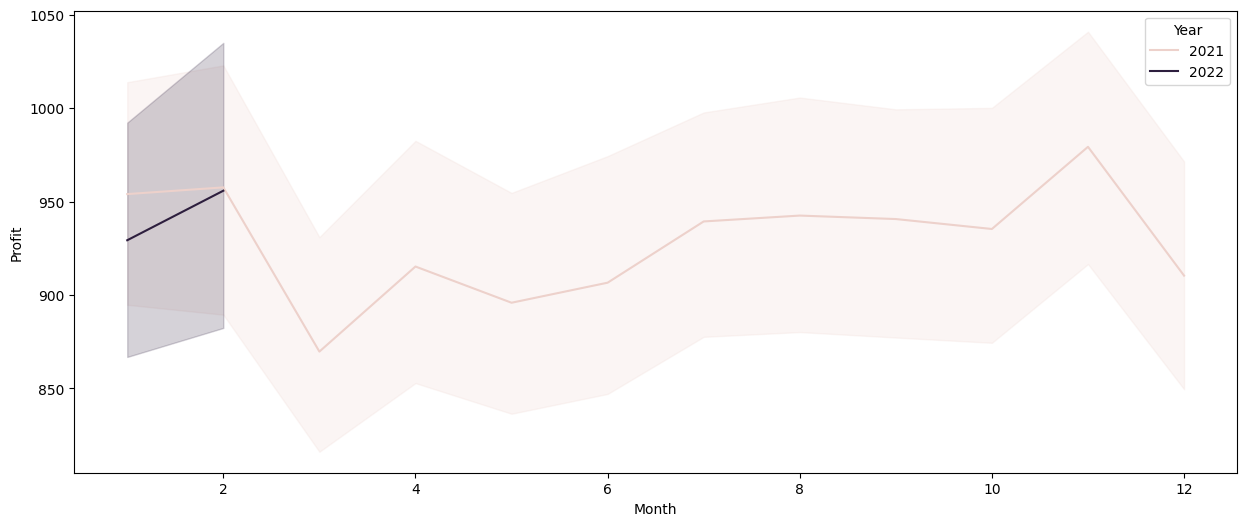

In [32]:
# use line chat to understand trends
plt.figure(figsize=(15,6))
sns.lineplot(x='Month', y='Profit', data=df, hue='Year')

In [33]:
# use pivot table
df.pivot_table(values='Profit', index='Year', columns='Month', aggfunc='sum')

Month         1          2          3         4          5          6   \
Year                                                                     
2021   661159.07  604274.56  603583.34  628786.9  636073.59  613776.11   
2022   663548.48  451164.70        NaN       NaN        NaN        NaN   

Month         7          8         9          10         11         12  
Year                                                                    
2021   659460.48  656012.37  635904.1  653821.33  663024.55  633632.94  
2022         NaN        NaN       NaN        NaN        NaN        NaN

<Axes: xlabel='Quarter', ylabel='Profit'>

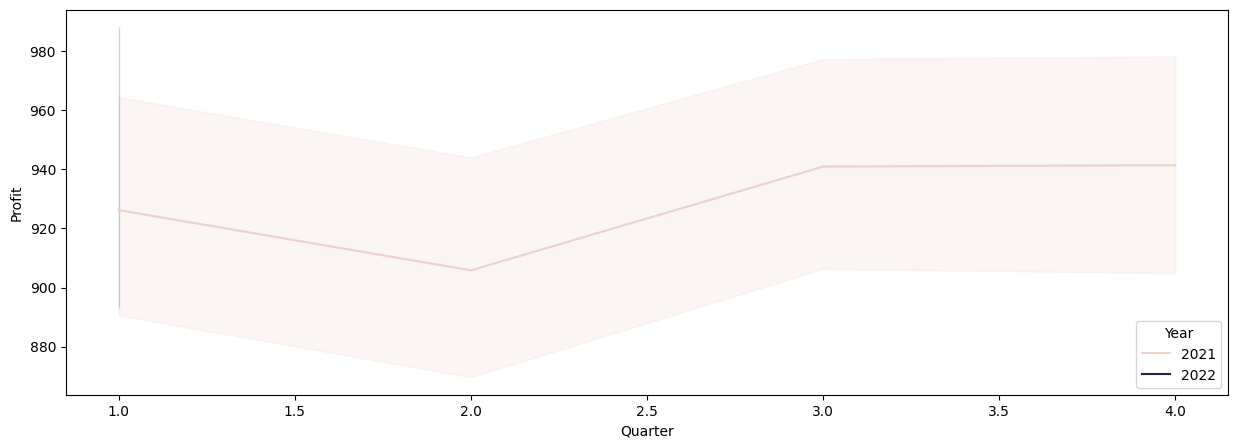

In [34]:
# Using a line chart to understand trends

plt.figure(figsize=(15,5))
sns.lineplot(x='Quarter', y="Profit", data=df, hue='Year')

In [35]:
# Using pivot table

df.pivot_table(values='Profit', index='Year', columns='Quarter', aggfunc='sum')

Quarter           1          2           3           4
Year                                                  
2021     1869016.97  1878636.6  1951376.95  1950478.82
2022     1114713.18        NaN         NaN         NaN

<Axes: xlabel='Region', ylabel='Profit'>

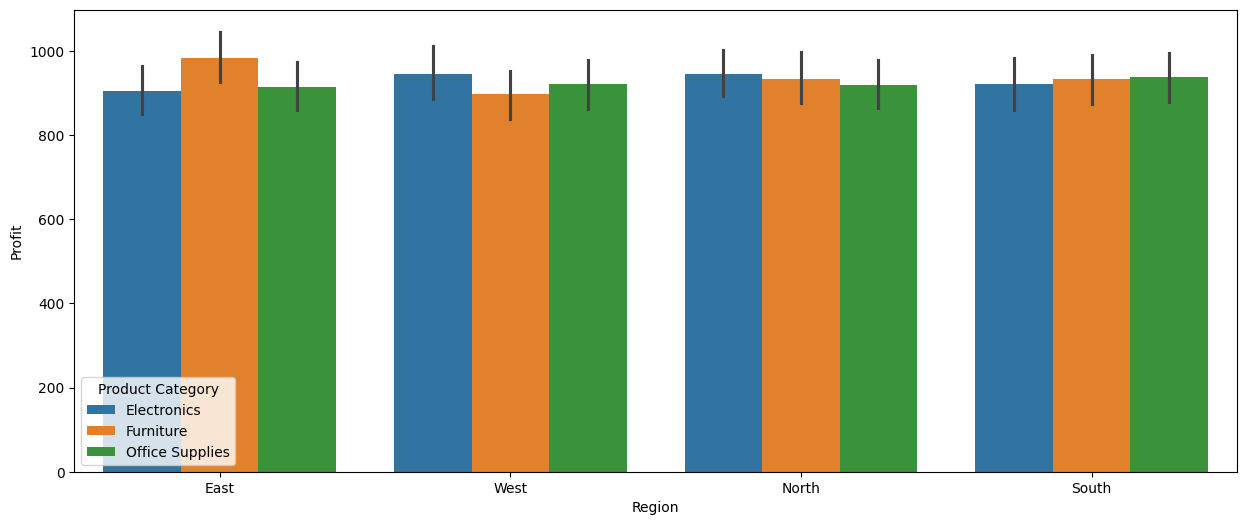

In [36]:
# region, product category and profit
plt.figure(figsize=(15,6))
sns.barplot(x='Region', y='Profit', data=df, hue='Product Category')

In [37]:
# use pivot table
df.pivot_table(values='Profit', index='Region',columns='Product Category', aggfunc='sum')

Product Category  Electronics  Furniture  Office Supplies
Region                                                   
East                726315.21  744151.45        704704.54
North               745873.00  753292.41        725334.36
South               705254.80  744571.28        739059.77
West                728926.32  741498.96        705240.42

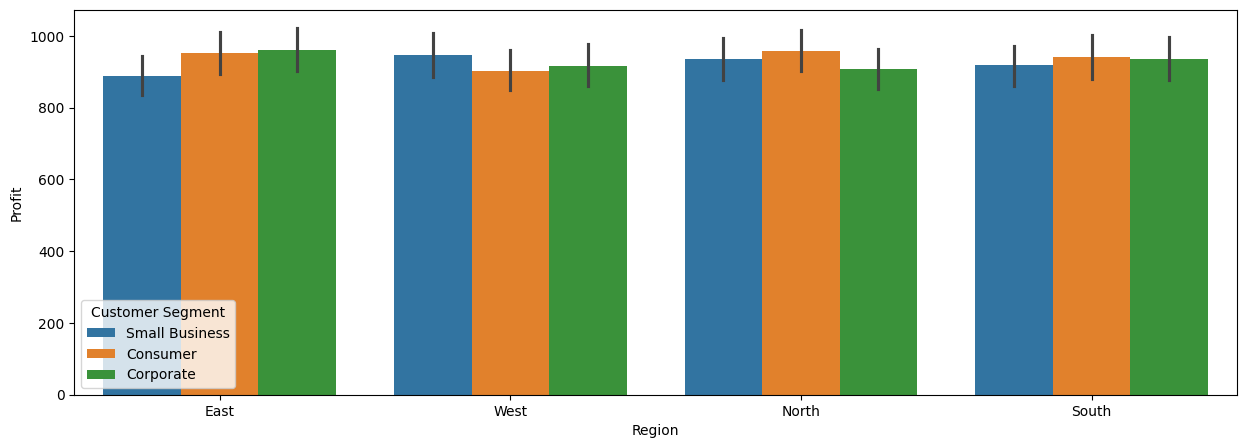

In [38]:
# Region, Customer Segment and Profit

plt.figure(figsize=(15,5))
sns.barplot(x="Region", y='Profit', data=df, hue="Customer Segment");

In [39]:
# Using pivot table

df.pivot_table(values='Profit', index='Region', columns='Customer Segment', aggfunc='sum')

Customer Segment   Consumer  Corporate  Small Business
Region                                                
East              735909.12  730129.30       709132.78
North             760404.19  748598.31       715497.27
South             741068.70  730161.83       717655.32
West              729892.75  739270.31       706502.64

In [40]:
# correlation between other variables in the dataset
df.select_dtypes(exclude='object').corr()

Order Date  Units Sold  Unit Price   Revenue  Profit Margin  \
Order Date       1.000000    0.002438    0.010988  0.015783      -0.006141   
Units Sold       0.002438    1.000000   -0.096477  0.626036      -0.056080   
Unit Price       0.010988   -0.096477    1.000000  0.608653      -0.045867   
Revenue          0.015783    0.626036    0.608653  1.000000      -0.100214   
Profit Margin   -0.006141   -0.056080   -0.045867 -0.100214       1.000000   
Profit           0.008849    0.528510    0.511599  0.819972       0.363688   
Costs            0.016530    0.618271    0.601573  0.992703      -0.193410   
Year             0.574427   -0.002458    0.005892  0.013600      -0.006365   
Month            0.453012    0.005656    0.005926  0.002677      -0.000496   
Quarter          0.464474    0.004116    0.006143  0.003164       0.002426   

                 Profit     Costs      Year     Month   Quarter  
Order Date     0.008849  0.016530  0.574427  0.453012  0.464474  
Units Sold     0.528510  0.618271 -0.002458  0.005656  0.004116  
Unit Price     0.511599  0.601573  0.005892  0.005926  0.006143  
Revenue        0.819972  0.992703  0.013600  0.002677  0.003164  
Profit Margin  0.363688 -0.193410 -0.006365 -0.000496  0.002426  
Profit         1.000000  0.744965  0.004492  0.004049  0.007197  
Costs          0.744965  1.000000  0.014903  0.002267  0.002171  
Year           0.004492  0.014903  1.000000 -0.466679 -0.433056  
Month          0.004049  0.002267 -0.466679  1.000000  0.975276  
Quarter        0.007197  0.002171 -0.433056  0.975276  1.000000

<Axes: >

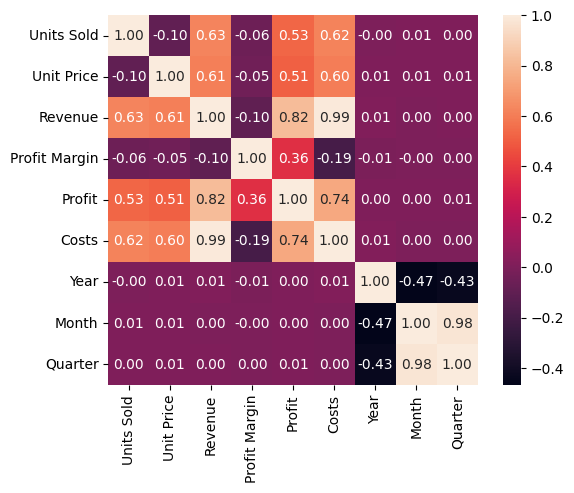

In [41]:
sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, square=True,fmt='.2f')

- Revenue and Costs (0.99)  There is perfect correlation
- Revenue and profit (0.82) Revenue is strongly correlated with Profit
- Costs and Profit (0.74) High positive correlation between them
- Unit price and Revenue (0.61) high positive correlation between them
- Units Sold and Revenue (0.63) high positive correlation between them
- Profit Margin and Revenue (-0.1) weak correlation shows
- Year, Month, Quarter suggesting that seasoality based effects may not strong in Revenue or Profit

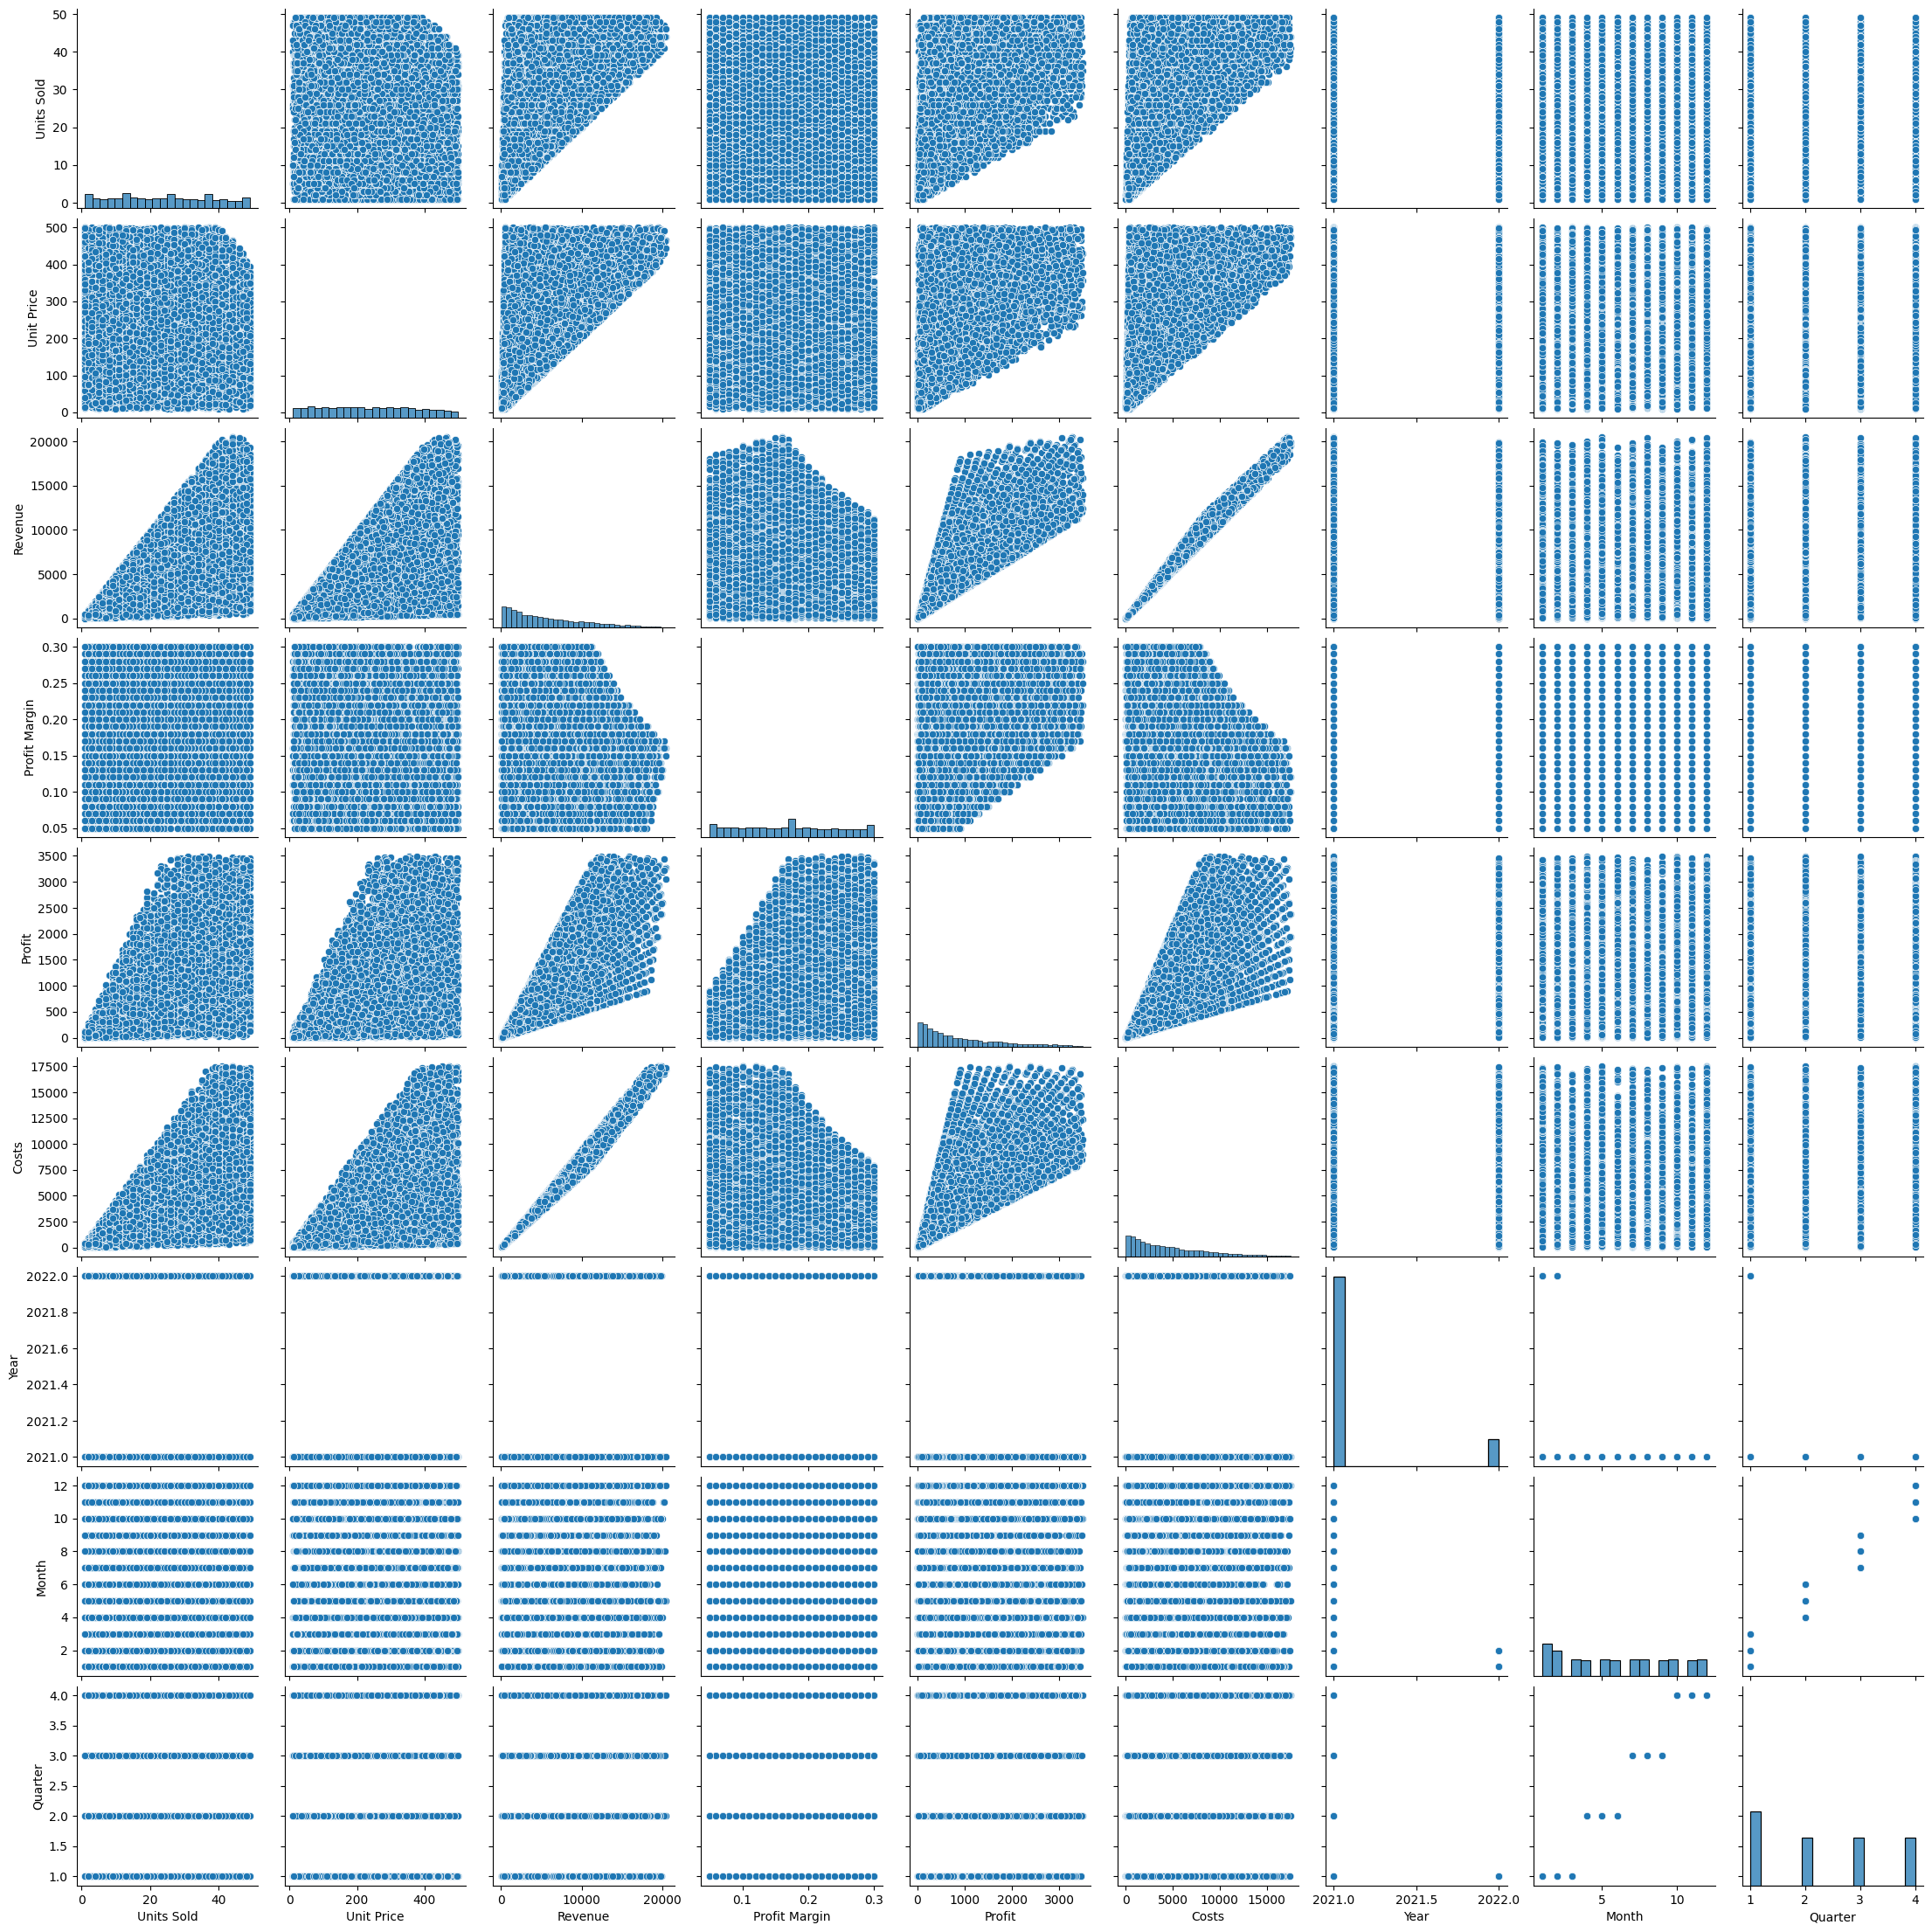

In [42]:
sns.pairplot(df)

In [43]:
# convert Order Date to date time
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [44]:
# group revenue by date and product
revenue_by_date_product = df.groupby(['Order Date','Product Category']).sum()['Revenue'].reset_index()
revenue_by_date_product.head(10)

Order Date Product Category   Revenue
0 2021-01-01 00:00:00      Electronics   1383.57
1 2021-01-01 01:00:00      Electronics   7804.89
2 2021-01-01 03:00:00      Electronics   1631.98
3 2021-01-01 05:00:00      Electronics   9000.75
4 2021-01-01 06:00:00        Furniture  17835.54
5 2021-01-01 07:00:00        Furniture   2372.48
6 2021-01-01 08:00:00        Furniture   3458.62
7 2021-01-01 09:00:00        Furniture   1340.15
8 2021-01-01 10:00:00  Office Supplies   6337.98
9 2021-01-01 11:00:00  Office Supplies  13252.41

In [45]:
# unique categories of the dataset
all_categories = revenue_by_date_product['Product Category'].unique()
all_categories

array(['Electronics', 'Furniture', 'Office Supplies'], dtype=object)

### Aggregate Revenue by Product Categories and Visualise trends for better anaysis

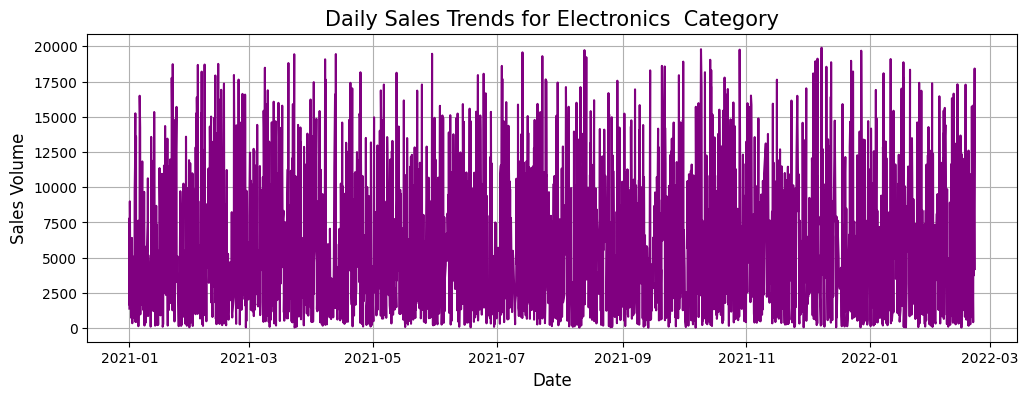

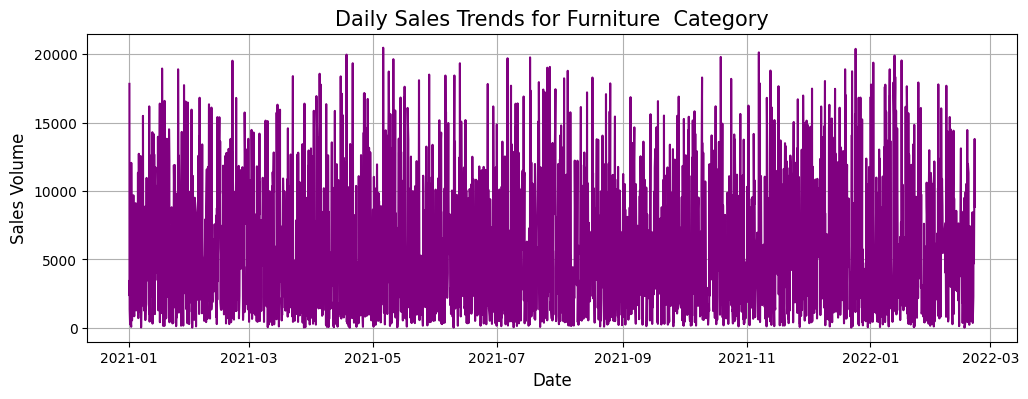

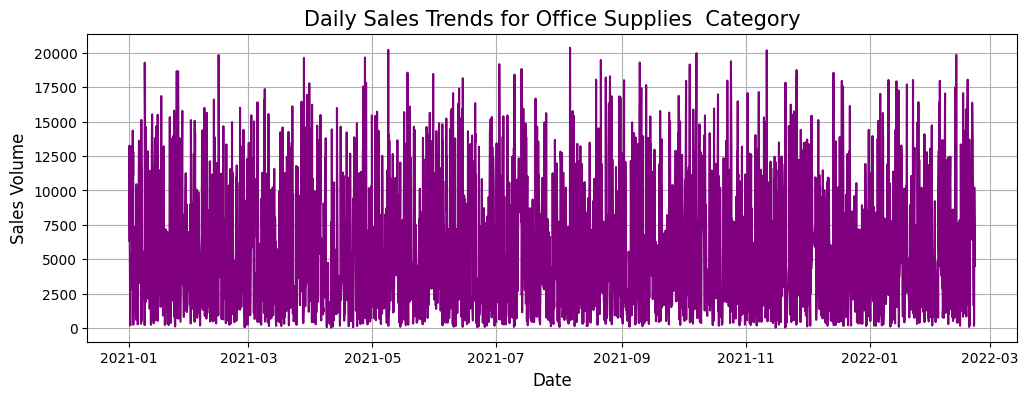

In [46]:
# loop through each unique product category
for category in revenue_by_date_product['Product Category'].unique():
    # filter the dataframe for the product category
    category_data = revenue_by_date_product[revenue_by_date_product['Product Category'] == category]

    plt.figure(figsize=(12,4))
    plt.plot(category_data['Order Date'], category_data['Revenue'], color='purple')
    plt.title(f'Daily Sales Trends for {category}  Category', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales Volume', fontsize=12)
    plt.grid(True)
    plt.show()

### above all categories significant sales volumes, indicating varying demand over time

# Build Forcasting models for each product category

- Prophet
- ARIMA
- Holt-winters
- LSTM

## 1.weekly  forecast with prophet

In [47]:
# Import required libraries
from prophet import Prophet

# copy revenue_by_date_product
revenue_by_week_category = revenue_by_date_product.copy()

# set date column as index
revenue_by_week_category = revenue_by_week_category.set_index('Order Date')  

# Ensure Order Date is datetime
revenue_by_week_category.index = pd.to_datetime(revenue_by_week_category.index)

# Group the dataset by week and categories
revenue_by_week_category = revenue_by_week_category.groupby([pd.Grouper(freq='W-MON'),'Product Category']).sum()

# reset the date index back as a column
revenue_by_week_category = revenue_by_week_category.reset_index()

revenue_by_week_category.head(10)

Order Date Product Category    Revenue
0 2021-01-04      Electronics  131756.93
1 2021-01-04        Furniture  116615.89
2 2021-01-04  Office Supplies  159902.30
3 2021-01-11      Electronics  265654.68
4 2021-01-11        Furniture  231958.60
5 2021-01-11  Office Supplies  335909.20
6 2021-01-18      Electronics  301489.20
7 2021-01-18        Furniture  364849.30
8 2021-01-18  Office Supplies  309488.13
9 2021-01-25      Electronics  277259.82

### split data into train and test sets

In [48]:
# create dictionaries to store train and test sets
weekly_sales_train_data = dict()
weekly_sales_test_data = dict()

for category in all_categories:
    # get the dataset for each category
    category_data = revenue_by_week_category[revenue_by_week_category['Product Category'] == category][['Order Date','Revenue']]

    # rename columns to 'ds' as data and 'y' weekly or monthly data
    category_data = category_data.rename(columns={'Order Date':'ds', 'Revenue':'y'})

    # store the train and test set
    weekly_sales_train_data[category] = category_data[category_data['ds'] <= '2021-11-30']
    weekly_sales_test_data[category] = category_data[category_data['ds'] > '2021-11-30']

In [49]:
# cofirms split
for category in all_categories:
    print(f'{category} - Train size: {len(weekly_sales_train_data[category])}, Test size:{len(weekly_sales_test_data[category])}')

Electronics - Train size: 48, Test size:12
Furniture - Train size: 48, Test size:12
Office Supplies - Train size: 48, Test size:12


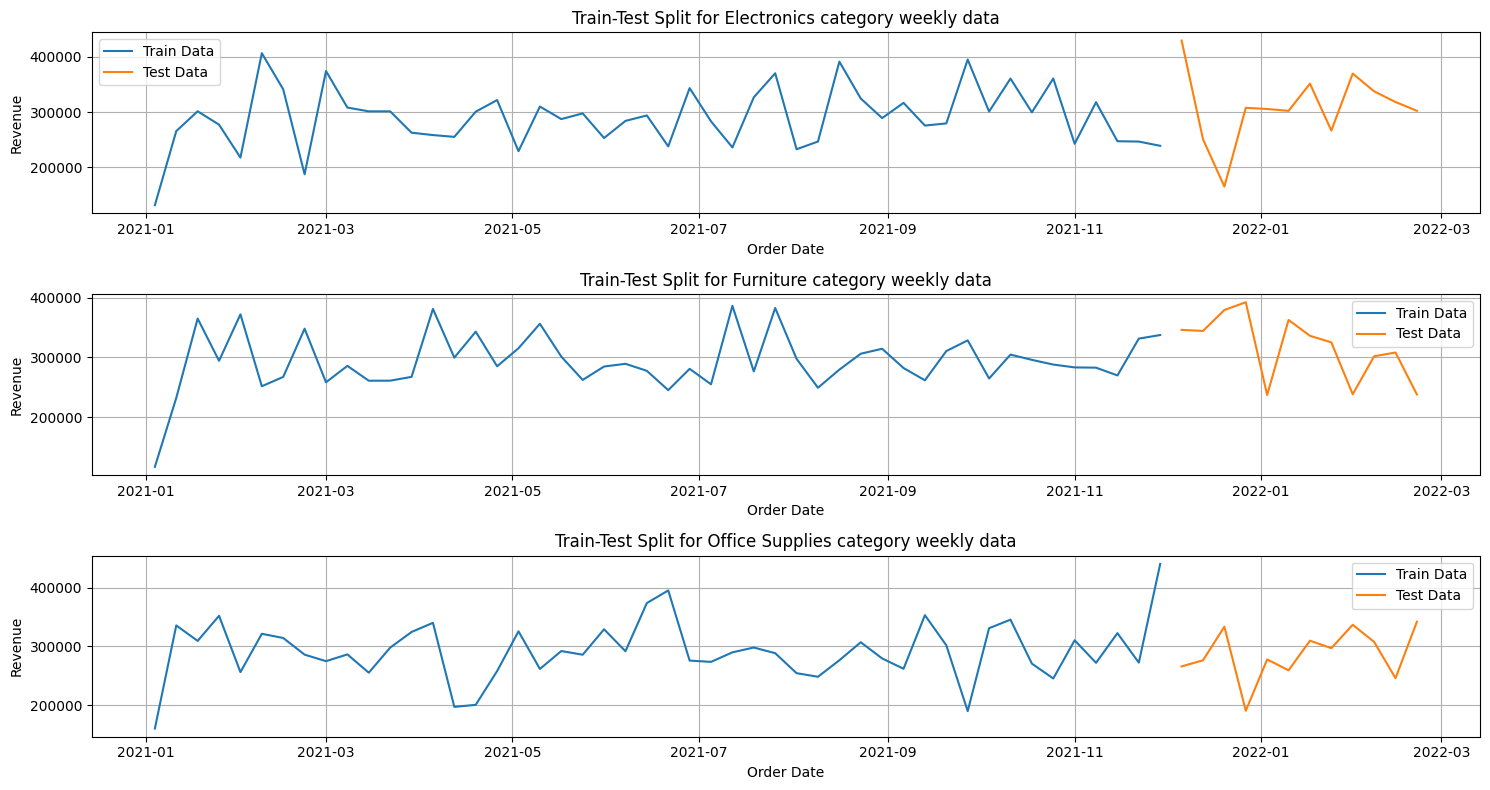

In [50]:
# visualize the split
plt.figure(figsize=(15, 8))
num_categories = len(all_categories)

for i in range(num_categories):
    category = all_categories[i]
    
    plt.subplot(num_categories, 1, i+1)
    
    # plot train data
    plt.plot(weekly_sales_train_data[category]['ds'],
             weekly_sales_train_data[category]['y'])
    
    # plot test data
    plt.plot(weekly_sales_test_data[category]['ds'],
             weekly_sales_test_data[category]['y'])
    
    plt.title(f'Train-Test Split for {category} category weekly data')
    plt.xlabel('Order Date')
    plt.ylabel('Revenue')
    plt.legend(['Train Data', 'Test Data'])
    plt.grid(True)

plt.tight_layout()  
plt.show()

In [51]:
# Create dictionaries to store the models
prophet_weekly_models = dict()
for category in all_categories:
    # Initialise the prophet model
    category_weekly_prophet = Prophet(yearly_seasonality = False, daily_seasonality=False)

    # Add custom weekly seasonality
    category_weekly_prophet.add_seasonality(name='weekly', period=7, fourier_order=3)

    #Train the model for each category
    category_weekly_prophet.fit(weekly_sales_train_data[category])
    
    # Store the model in the dictionary
    prophet_weekly_models[category] = category_weekly_prophet

   

18:42:39 - cmdstanpy - INFO - Chain [1] start processing
18:42:39 - cmdstanpy - INFO - Chain [1] done processing
18:42:39 - cmdstanpy - INFO - Chain [1] start processing
18:42:39 - cmdstanpy - INFO - Chain [1] done processing
18:42:40 - cmdstanpy - INFO - Chain [1] start processing
18:42:40 - cmdstanpy - INFO - Chain [1] done processing


### plot the forecasts for each category

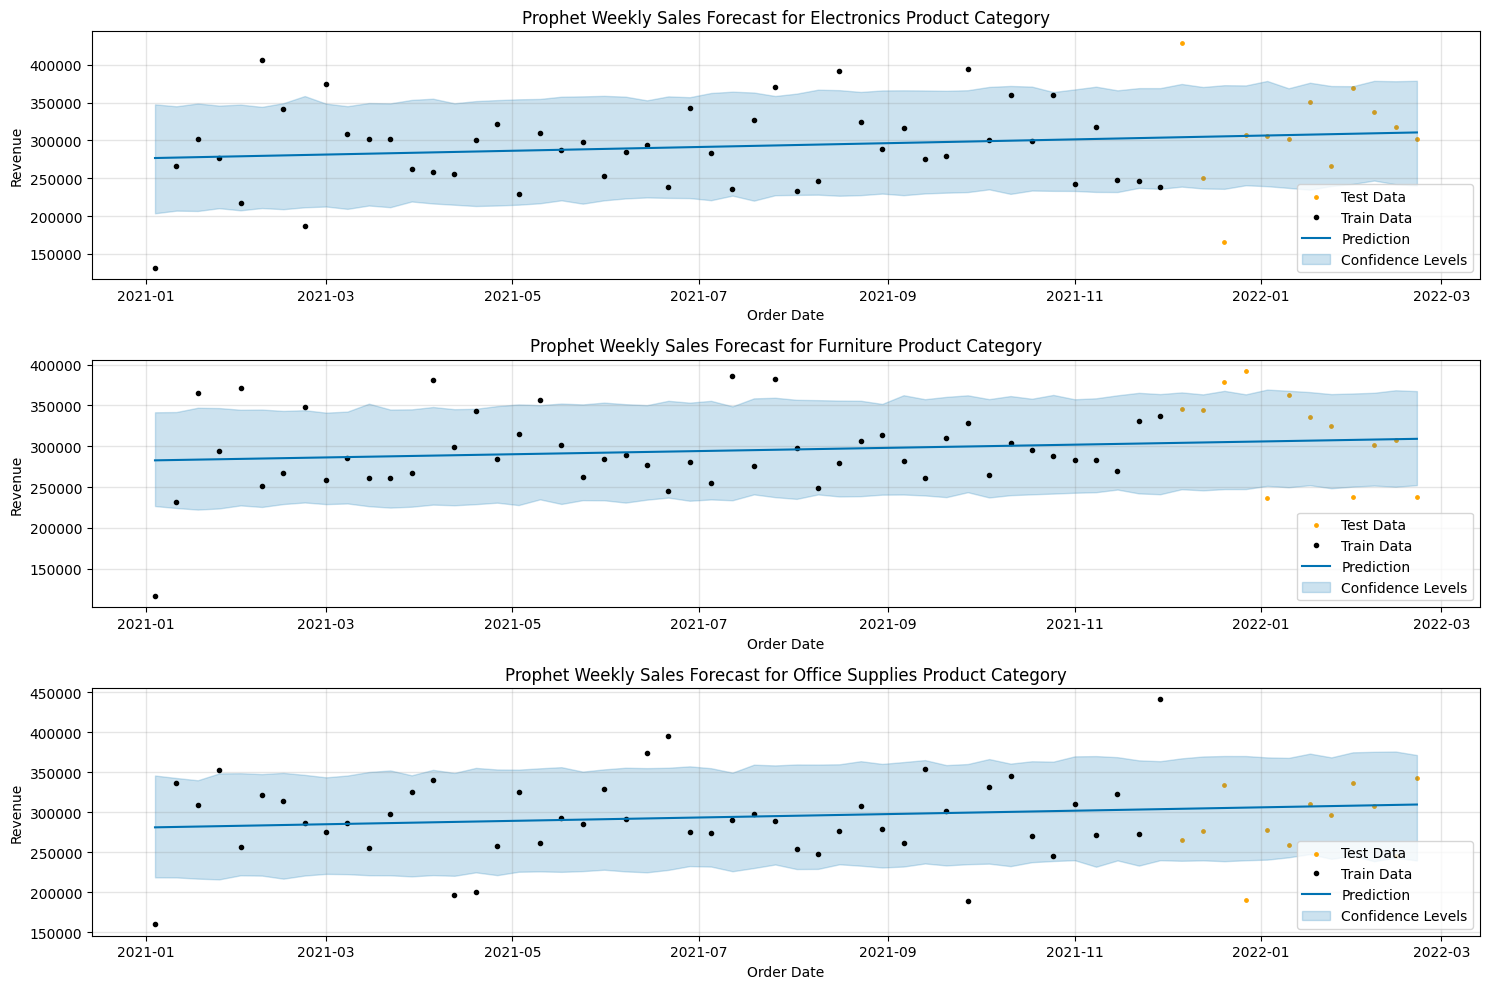

In [52]:
# Store the forecast for the test set
prophet_weekly_forecast = dict()

# Axes and figure for plotting
fig, ax = plt.subplots(num_categories, 1, figsize=(15, 10))

for i in range(num_categories):
   category = all_categories[i]
   
   # Get the number of periods in the test set for the category
   num_periods = len(weekly_sales_test_data[category])
   
   # Create the actual dates we want to predict for 
   category_future_dates = prophet_weekly_models[category].make_future_dataframe(
       periods=num_periods,
       freq='W-MON'
   )
   
   # Make predictions
   category_forecast = prophet_weekly_models[category].predict(category_future_dates)
   
   # Store the forecast
   prophet_weekly_forecast[category] = category_forecast[-num_periods:]
   
   # Plot the test data
   ax[i].scatter(
       weekly_sales_test_data[category]['ds'],
       weekly_sales_test_data[category]['y'],
       color='orange',
       s=6
   )
   
   # Plot the forecast
   category_plot = prophet_weekly_models[category].plot(
       category_forecast,
       ax=ax[i],
       figsize=(15, 7)
   )
   
   # Set plot labels and title
   ax[i].set_title(f'Prophet Weekly Sales Forecast for {category} Product Category')
   ax[i].set_xlabel('Order Date')
   ax[i].set_ylabel('Revenue')  
   ax[i].legend(['Test Data', 'Train Data', 'Prediction', 'Confidence Levels'])

plt.tight_layout()  
plt.show()

### Model Evaluation

In [53]:
# Import necessary metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import math


mae,rmse, mape = 0,0,0

prophet_weekly_mape_scores = dict()
for category in all_categories:
    # Get test set
    test_data = weekly_sales_test_data[category]['y'].values
    
    # Forecasted data
    forecast_data = prophet_weekly_forecast[category]['yhat'].values
    
    # Calculate MAE
    category_mae = mean_absolute_error(test_data, forecast_data)
    
    # Calculate RMSE
    category_rmse = math.sqrt(mean_squared_error(test_data, forecast_data))
    
    # Calculate MAPE
    category_mape = np.mean(np.abs((test_data - forecast_data) / test_data)) * 100
    
    # Store the calculated values
    mae += category_mae
    rmse += category_rmse
    mape += category_mape
    
    prophet_weekly_mape_scores[category] = category_mape

# get the average value of each score per category
mae /= len(all_categories)
rmse /= len(all_categories)
mape /= len(all_categories)

# see the results
print('MAE:',mae)
print('RMSE:',rmse)
print('MAPE:',mape)


MAE: 41805.10390720725
RMSE: 54219.874706039955
MAPE: 15.35143776882704


### Forecasting Monthly with Prophet

In [54]:
# copy the sales_by _date_category data
revenue_by_month_category = revenue_by_date_product.copy()

revenue_by_month_category['Order Date'] = pd.to_datetime(revenue_by_month_category['Order Date'])

# Set 'Order Date' as index
revenue_by_month_category = revenue_by_month_category.set_index('Order Date')

# Group the dataset by month start ('MS') and categories
revenue_by_month_category = revenue_by_month_category.groupby(
    [pd.Grouper(freq='MS'), 'Product Category']
).sum()

# Reset the index back to columns
revenue_by_month_category = revenue_by_month_category.reset_index()

# Display the first 10 rows
revenue_by_month_category.head(10)


Order Date Product Category     Revenue
0 2021-01-01      Electronics  1155577.94
1 2021-01-01        Furniture  1338490.91
2 2021-01-01  Office Supplies  1385253.54
3 2021-02-01      Electronics  1278056.47
4 2021-02-01        Furniture  1116003.30
5 2021-02-01  Office Supplies  1200999.75
6 2021-03-01      Electronics  1311098.15
7 2021-03-01        Furniture  1214610.93
8 2021-03-01  Office Supplies  1277783.12
9 2021-04-01      Electronics  1186832.17

In [55]:

# Create dictionaries to store train and test sets
monthly_sales_train_data = dict()
monthly_sales_test_data = dict()

for category in all_categories:
    # Filter dataset for the category
    category_data = revenue_by_month_category[revenue_by_month_category['Product Category'] == category][['Order Date', 'Revenue']]

    # Rename columns for Prophet compatibility
    category_data = category_data.rename(columns={'Order Date': 'ds', 'Revenue': 'y'})

    # Sort data chronologically
    category_data = category_data.sort_values(by='ds')

    # Define training and test set dates
    train_end_date = '2021-11-30'  # 11 months
    monthly_sales_train_data[category] = category_data[category_data['ds'] <= train_end_date]
    monthly_sales_test_data[category] = category_data[category_data['ds'] > train_end_date]


In [56]:
# Confirm split
for category in all_categories:
    print(f"{category} - Train size: {len(monthly_sales_train_data[category])}, Test size: {len(monthly_sales_test_data[category])}")


Electronics - Train size: 11, Test size: 3
Furniture - Train size: 11, Test size: 3
Office Supplies - Train size: 11, Test size: 3


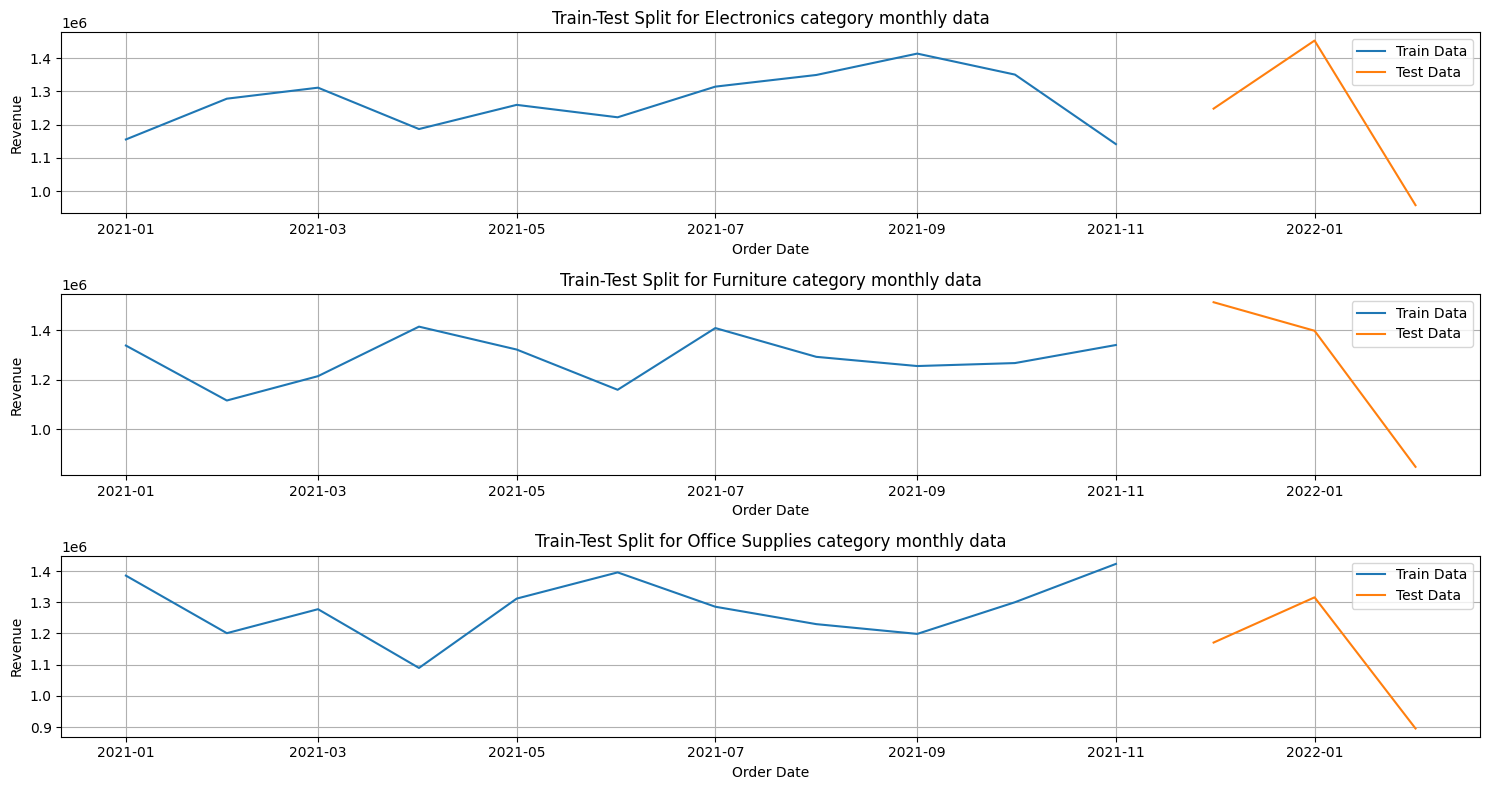

In [57]:
# visualize the split
plt.figure(figsize=(15, 8))
num_categories = len(all_categories)

for i in range(num_categories):
    category = all_categories[i]
    
    plt.subplot(num_categories, 1, i+1)
    
    # plot train data
    plt.plot(monthly_sales_train_data[category]['ds'],
             monthly_sales_train_data[category]['y'])
    
    # plot test data
    plt.plot(monthly_sales_test_data[category]['ds'],
             monthly_sales_test_data[category]['y'])
    
    plt.title(f'Train-Test Split for {category} category monthly data')
    plt.xlabel('Order Date')
    plt.ylabel('Revenue')
    plt.legend(['Train Data', 'Test Data'])
    plt.grid(True)

plt.tight_layout()  
plt.show()

### Build the model

In [58]:
# create dictionaries to store the models
prophet_monthly_models = dict()

for category in all_categories:
    
    # Initialise the Prophet model
    category_monthly_prophet = Prophet(yearly_seasonality=False, daily_seasonality=False)
    
    # Add custom monthly seasonality
    category_monthly_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=3)
    
    # Train the model for each category
    category_monthly_prophet.fit(monthly_sales_train_data[category])
    
    # Store the model in the dictionary
    prophet_monthly_models[category] = category_monthly_prophet

18:42:54 - cmdstanpy - INFO - Chain [1] start processing
18:42:54 - cmdstanpy - INFO - Chain [1] done processing
18:42:54 - cmdstanpy - INFO - Chain [1] start processing
18:42:54 - cmdstanpy - INFO - Chain [1] done processing
18:42:54 - cmdstanpy - INFO - Chain [1] start processing
18:42:54 - cmdstanpy - INFO - Chain [1] done processing


### plot the forecasts for each category

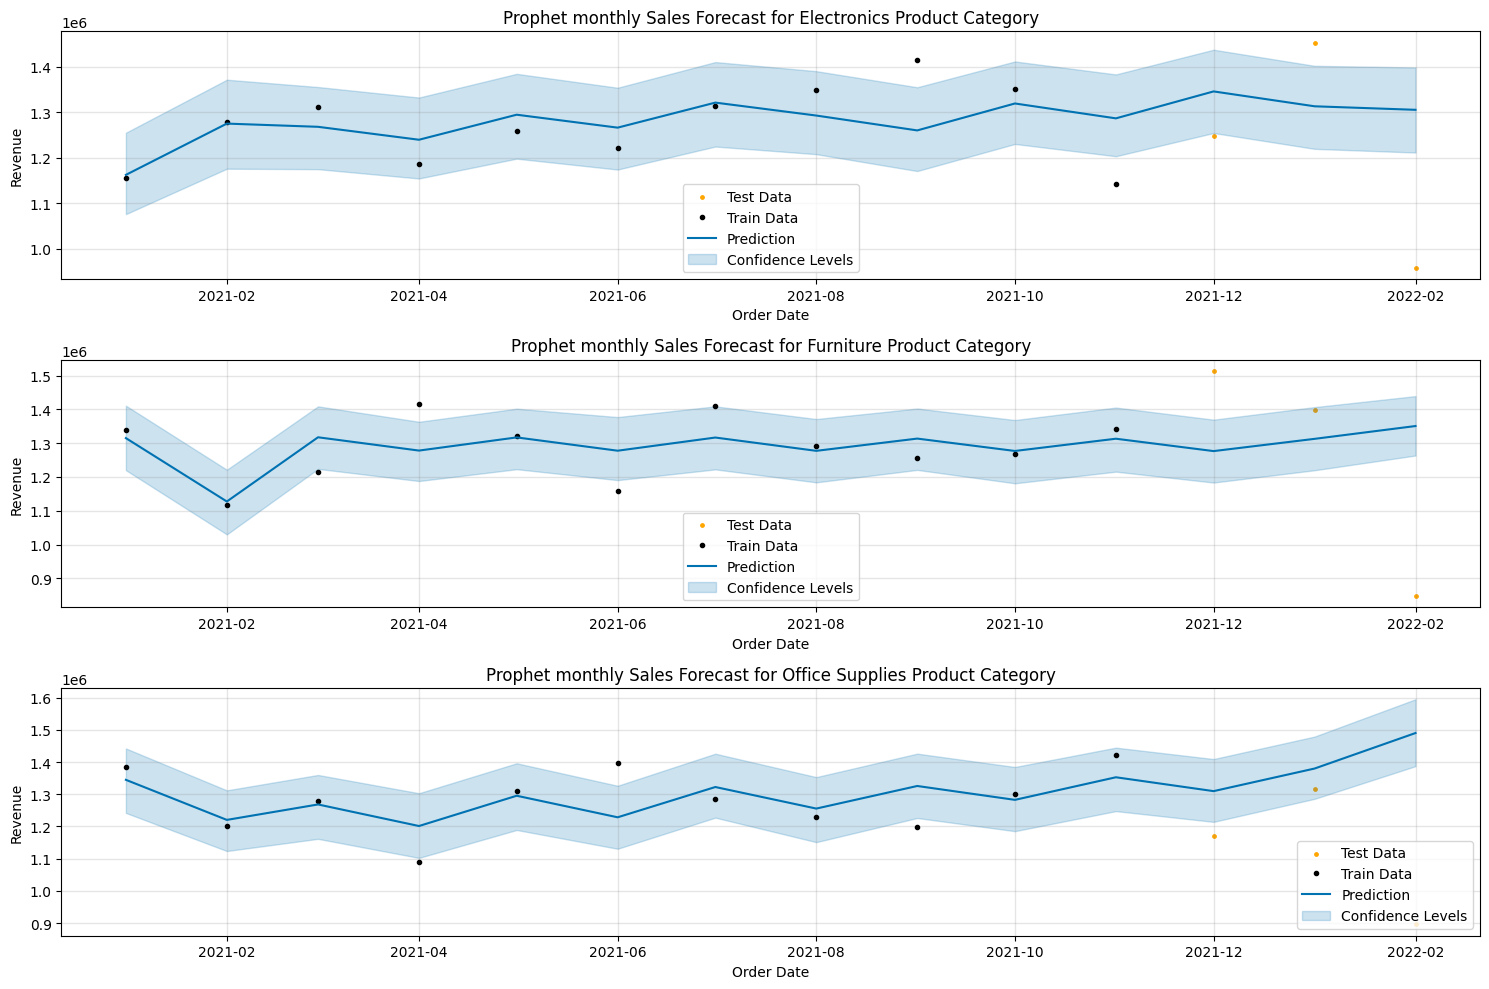

In [59]:
# Store the forecast for the test set
prophet_monthly_forecast = dict()

# Axes and figure for plotting
fig, ax = plt.subplots(num_categories, 1, figsize=(15, 10))

for i in range(num_categories):
   category = all_categories[i]
   
   # Get the number of periods in the test set for the category
   num_periods = len(monthly_sales_test_data[category])
   
   # Create the actual dates we want to predict for 
   category_future_dates = prophet_monthly_models[category].make_future_dataframe(
       periods=num_periods,
       freq='MS'
   )
   
   # Make predictions
   category_forecast = prophet_monthly_models[category].predict(category_future_dates)
   
   # Store the forecast
   prophet_monthly_forecast[category] = category_forecast[-num_periods:]
   
   # Plot the test data
   ax[i].scatter(
       monthly_sales_test_data[category]['ds'],
       monthly_sales_test_data[category]['y'],
       color='orange',
       s=6
   )
   
   # Plot the forecast
   category_plot = prophet_monthly_models[category].plot(
       category_forecast,
       ax=ax[i],
       figsize=(15, 7)
   )
   
   # Set plot labels and title
   ax[i].set_title(f'Prophet monthly Sales Forecast for {category} Product Category')
   ax[i].set_xlabel('Order Date')
   ax[i].set_ylabel('Revenue')  
   ax[i].legend(['Test Data', 'Train Data', 'Prediction', 'Confidence Levels'])

plt.tight_layout()  
plt.show()

### model evaluation

In [60]:
import math
mae,rmse,mape = 0,0,0

prophet_monthly_mape_scores = dict()
for category in all_categories:
    # Get test set
    test_data = monthly_sales_test_data[category]['y'].values
    
    # Forecasted data
    forecast_data = prophet_monthly_forecast[category]['yhat'].values
    
    # Calculate MAE
    category_mae = mean_absolute_error(test_data, forecast_data)
    
    # Calculate RMSE
    category_rmse = math.sqrt(mean_squared_error(test_data, forecast_data))
    
    # Calculate MAPE
    category_mape = np.mean(np.abs((test_data - forecast_data) / test_data)) * 100
    
    # Store the calculated values
    mae += category_mae
    rmse += category_rmse
    mape += category_mape

    prophet_monthly_mape_scores[category] = category_mape

# get the average value of each score per category
mae /= len(all_categories)
rmse /= len(all_categories)
mape /= len(all_categories)

# see the results
print('MAE:',mae)
print('RMSE:',rmse)
print('MAPE:',mape)

    

MAE: 245206.96144637806
RMSE: 300754.3791278316
MAPE: 24.201335154115725


# 2. Weekly Forecasting with ARIMA model

### Test for Stationarity
Testing for stationarity is important because our dataset is a time series, and many forecasting models assume that the statistical properties of the time series (mean, variance, and autocorrelation) are constant over time, meaning for a data to be satationary it should not have any long term trends or patterns

In [61]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adf_test(series):
    # Perform the Augmented Dickey-Fuller test
    result = adfuller(series)
    
    # Create a Series to store test results
    dfoutput = pd.Series(result[0:4], index=['Test Statistic', 
                                             'p-value',
                                             '#lags used', 
                                             'number of observations used'])
    
    # Add critical values to the output
    for key, value in result[4].items():
        dfoutput['critical value (%s)' % key] = value 
    return dfoutput

In [62]:
#copy the aggregated data
revenue_by_week_category_arima=revenue_by_week_category.copy()
revenue_by_week_category_arima.head(10)

Order Date Product Category    Revenue
0 2021-01-04      Electronics  131756.93
1 2021-01-04        Furniture  116615.89
2 2021-01-04  Office Supplies  159902.30
3 2021-01-11      Electronics  265654.68
4 2021-01-11        Furniture  231958.60
5 2021-01-11  Office Supplies  335909.20
6 2021-01-18      Electronics  301489.20
7 2021-01-18        Furniture  364849.30
8 2021-01-18  Office Supplies  309488.13
9 2021-01-25      Electronics  277259.82

### check for stationarity

In [63]:
# Dictionary to store the weekly stationarity results       
weekly_stationarity = dict()

for category in all_categories:
    # Get the subset for the category
    category_data = revenue_by_week_category_arima[revenue_by_week_category_arima['Product Category'] == category]
    
    # Check for stationarity
    category_stationarity = adf_test(category_data['Revenue']) 
   
    # Store the results in the dictionary
    weekly_stationarity[category] = category_stationarity.values 
#show results
pd.DataFrame(weekly_stationarity, index=category_stationarity.index)


Electronics     Furniture  Office Supplies
Test Statistic              -7.698378e+00 -8.133106e+00    -8.512874e+00
p-value                      1.359955e-11  1.076967e-12     1.154743e-13
#lags used                   1.000000e+00  0.000000e+00     0.000000e+00
number of observations used  5.800000e+01  5.900000e+01     5.900000e+01
critical value (1%)         -3.548494e+00 -3.546395e+00    -3.546395e+00
critical value (5%)         -2.912837e+00 -2.911939e+00    -2.911939e+00
critical value (10%)        -2.594129e+00 -2.593652e+00    -2.593652e+00

### Null Hypothesis (H₀):
The time series is non-stationary (it has a unit root).

This implies that the time series data has changing statistical properties over time, such as mean, variance, or autocovariance.

### Alternative Hypothesis (H₁):
The time series is stationary (it does not have a unit root).

This means that the statistical properties of the time series data, such as mean, variance, and autocovariance, remain constant over time.

### Decision Rule:
If the p-value < 0.05, reject the null hypothesis (H₀) and conclude that the time series is stationary.
If the p-value ≥ 0.05, fail to reject the null hypothesis (H₀) and conclude that the time series is non-stationary.

p-value extremely small so reject the null hypothesis
p<< 0.05 so reject Ho the series is stationary
also test statistic more negative support stationary



## Build ARIMA MODEL
The first step is to identify the ARIMA Parameters (p, d, q) where
- p (AR order): Number of lag observations in the AutoRegressive model.
- d (difference order): Number of differencing steps (already 0 since your data is stationary).
- q (MA order): Number of lagged forecast errors in the Moving Average model.
Use Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to estimate p and q

In [64]:
# Check column names and structure
print("Columns in the dataset:", revenue_by_week_category_arima.columns)

# Display a sample of the dataset
print(revenue_by_week_category_arima.head())


Columns in the dataset: Index(['Order Date', 'Product Category', 'Revenue'], dtype='object')
  Order Date Product Category    Revenue
0 2021-01-04      Electronics  131756.93
1 2021-01-04        Furniture  116615.89
2 2021-01-04  Office Supplies  159902.30
3 2021-01-11      Electronics  265654.68
4 2021-01-11        Furniture  231958.60


In [65]:
# Count rows for each category
category_counts = revenue_by_week_category_arima['Product Category'].value_counts()
print("Row counts for each category:\n", category_counts)


Row counts for each category:
 Product Category
Electronics        60
Furniture          60
Office Supplies    60
Name: count, dtype: int64


In [66]:
# Check for duplicate rows
duplicates = revenue_by_week_category_arima.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [67]:
# Check date range
print("Date range in the dataset:", revenue_by_week_category_arima['Order Date'].min(), "to", revenue_by_week_category_arima['Order Date'].max())


Date range in the dataset: 2021-01-04 00:00:00 to 2022-02-21 00:00:00


### Plot ACF and PACF

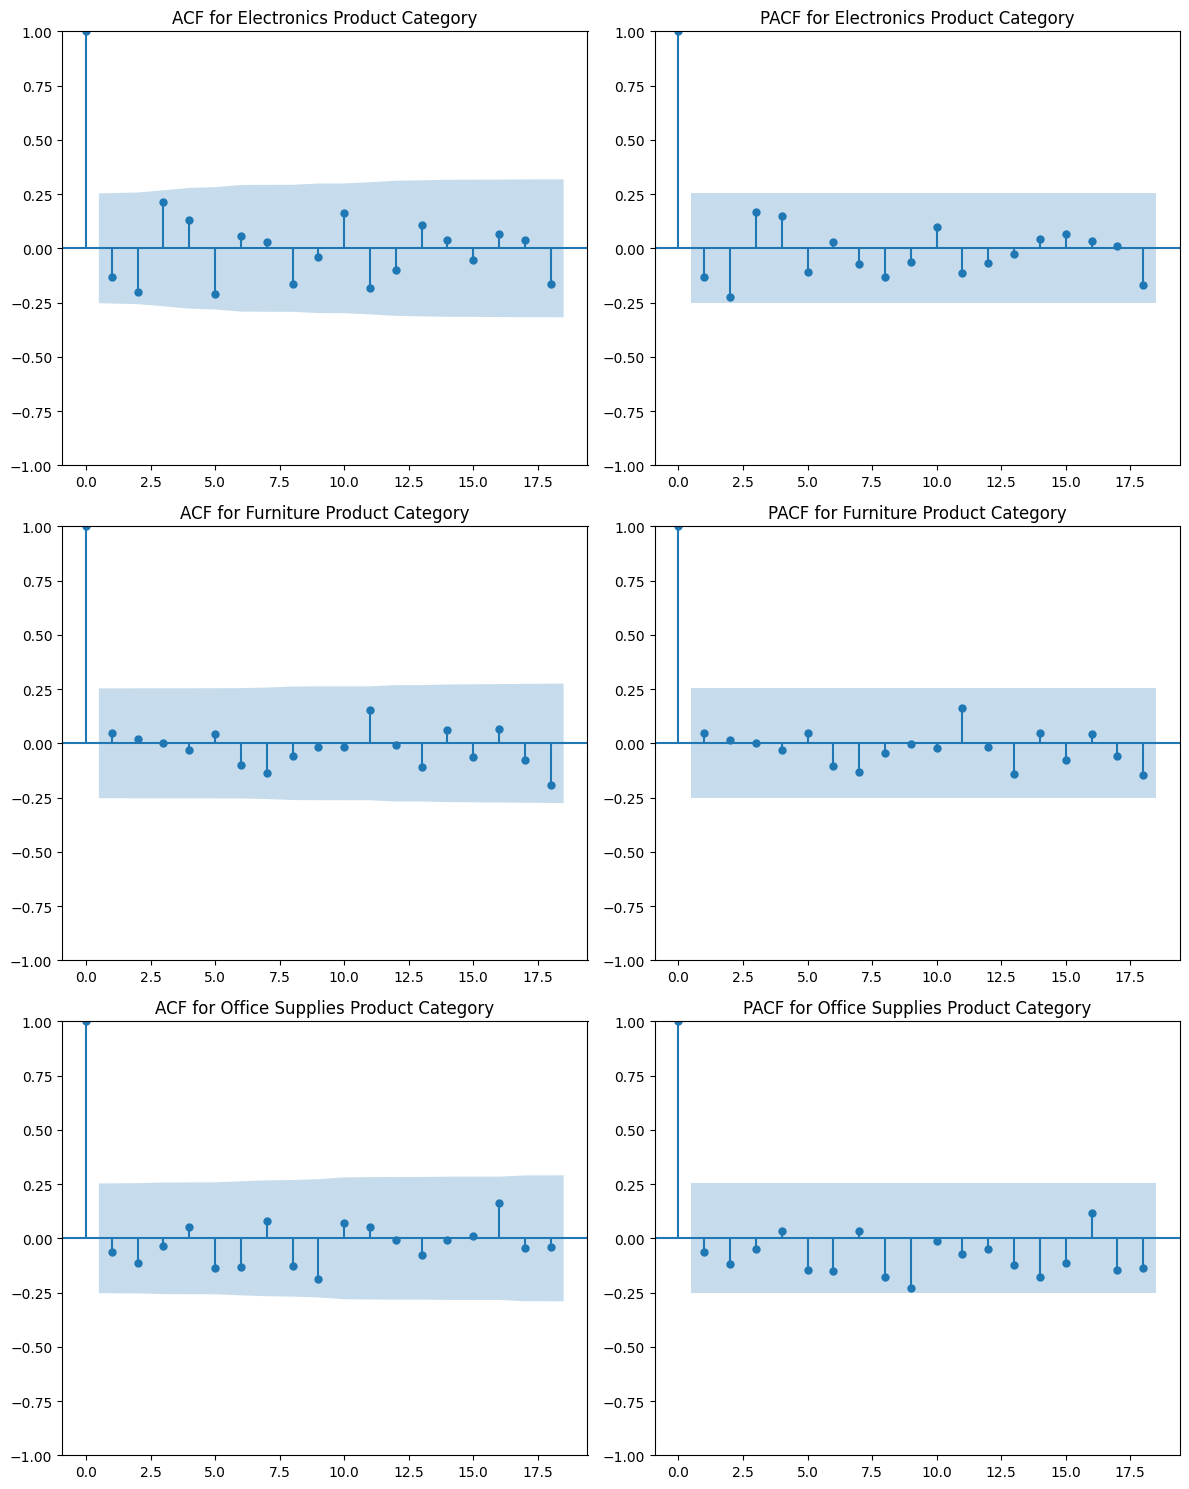

In [68]:
# Plot ACF and PACF for all categories
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

num_categories = len(all_categories)

# Create subplots for all categories
fig, ax = plt.subplots(num_categories, 2, figsize=(12, 5 * num_categories))

for i in range(num_categories):
    category = all_categories[i]

    # Get the subset for that category
    category_data = revenue_by_week_category_arima[
        revenue_by_week_category_arima['Product Category'] == category
    ]

    # Plot the ACF for that category
    plot_acf(
        category_data['Revenue'], 
        ax=ax[i, 0], 
        title=f'ACF for {category} Product Category'
    )

    # Plot the PACF for that category
    plot_pacf(
        category_data['Revenue'], 
        ax=ax[i, 1], 
        title=f'PACF for {category} Product Category'
    )

# Adjust layout and show the final plots
plt.tight_layout()
plt.show()


Electronics

ACF: Only the first lag (lag 1) is clearly high, others quickly drop within the blue zone.

PACF: Same — strong spike at lag 1, then almost flat.
 Interpretation:
This looks like an AR(1) process — meaning the current week’s sales mainly depend on the previous week’s.
 Suggest ARIMA(1,0,0) (since ADF test said stationary → d=0).

 Furniture

ACF: Starts high at lag 1, then small oscillating correlations.

PACF: Strong spike at lag 1, then almost flat.
  Interpretation:
Similar pattern → mostly AR(1) structure.
  Try ARIMA(1,0,0) first.

  Office Supplies

ACF: Lag 1 strong, maybe lag 2 small; rest inside blue.

PACF: Strong lag 1, others tiny.
 Interpretation:
Again, looks like AR(1) — very simple dependence.
 Try ARIMA(1,0,0).

### split the data into train and test sets

In [69]:
# Create a dictionary to store the train and test data
weekly_sales_train_data = dict()
weekly_sales_test_data = dict()

for category in all_categories:

    # get the dataset for each category
    category_data = revenue_by_week_category_arima[ revenue_by_week_category_arima['Product Category'] == category][['Order Date', 'Revenue']]

    # Store the train and test set
    weekly_sales_train_data[category]= category_data[category_data['Order Date'] <= '2021-11-30']
    weekly_sales_test_data[category]= category_data[category_data['Order Date'] > '2021-11-30']

### fit the ARIMA on the dataset

In [70]:
from statsmodels.tsa.arima.model import ARIMA
# dictionary to store the models
arima_weekly_models = dict()
for category in all_categories:
    # initialise the model
    category_model = ARIMA(weekly_sales_train_data[category]['Revenue'].values, order= (1,1,3)) # MA = 2, AR= 0

    # Train the model
    category_weekly_arima_model = category_model.fit()
    # store the model
    arima_weekly_models[category] = category_weekly_arima_model

C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### forcaste for '2021-11-30' and above

In [71]:
arima_weekly_forecasts = dict()

for category in all_categories:
    # get the size of test data
    num_steps = len(weekly_sales_test_data[category])

    # Forecaste for that category
    category_forecast = arima_weekly_models[category].forecast(steps=num_steps)

    # store the forecasts
    arima_weekly_forecasts[category] = category_forecast
    

### plot the actual and forecasted sales data

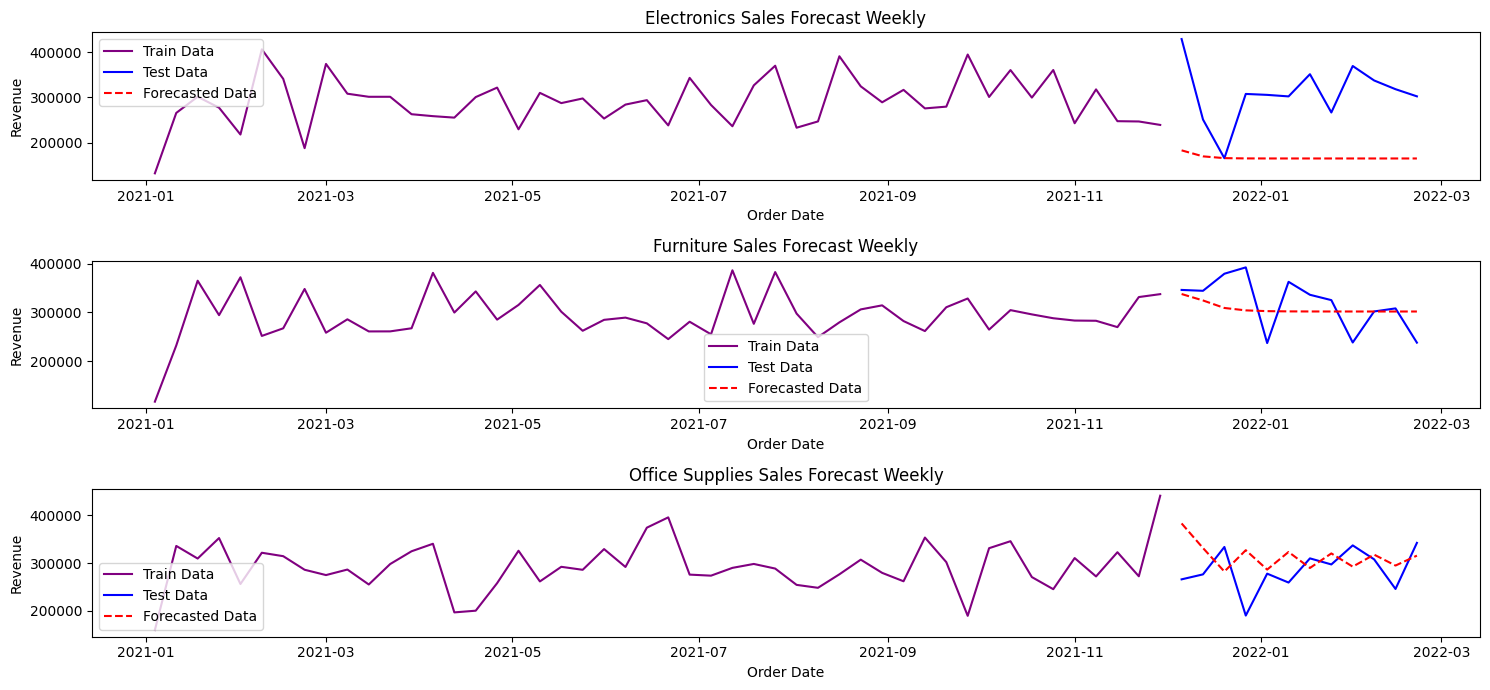

In [72]:
plt.figure(figsize=(15, 7))
# get the number of categories
num_categories = len(all_categories)

for i in range(num_categories):
    category = all_categories[i]
    plt.subplot(num_categories, 1, i+1)
    
    # plot train data
    plt.plot(weekly_sales_train_data[category]['Order Date'],
             weekly_sales_train_data[category]['Revenue'],  
             label='Actual Sales (Train Data)', 
             color='purple')
    
    # plot test data
    plt.plot(weekly_sales_test_data[category]['Order Date'],
             weekly_sales_test_data[category]['Revenue'],
             label='Actual Sales (Test Data)', 
             color='blue')
    
    # plot forecasted data
    plt.plot(weekly_sales_test_data[category]['Order Date'],
             arima_weekly_forecasts[category],
             label='Forecasted Sales', 
             color='red',
             linestyle='--')  
    
    plt.title(f'{category} Sales Forecast Weekly')
    plt.xlabel('Order Date')
    plt.ylabel('Revenue')
    plt.legend(['Train Data', 'Test Data', 'Forecasted Data'])

plt.tight_layout()
plt.show()

### evaluate on MAE,RMSE,MAPE

In [73]:
import math
mae, rmse, mape = 0, 0, 0
arima_weekly_mape_scores = dict()

for category in all_categories:
    # get the test data for that category
    test_data = weekly_sales_test_data[category]['Revenue'].values
    # get forecast data for that category
    forecast_data = arima_weekly_forecasts[category]
    
    # calculate MAE,RMSE and MAPE
    category_mae = mean_absolute_error(test_data, forecast_data)
    category_rmse = math.sqrt(mean_squared_error(test_data, forecast_data))
    category_mape = np.mean(np.abs((test_data - forecast_data)/test_data)) * 100  
    
    # store calculated value
    mae += category_mae
    rmse += category_rmse
    mape += category_mape
    
    # Store individual category scores
    arima_weekly_mape_scores[category] = category_mape
        

# get the average
mae /= len(all_categories)
rmse /= len(all_categories)
mape /= len(all_categories)

# print results
print('MAE:', mae)
print('RMSE:', rmse)  
print('MAPE:', mape)  

MAE: 78277.21648584757
RMSE: 89615.03900056994
MAPE: 25.667198565326288


# Forecast Monthly ARIMA model

In [74]:
revenue_by_month_category_arima = revenue_by_month_category.copy()
revenue_by_month_category_arima.head(10)

Order Date Product Category     Revenue
0 2021-01-01      Electronics  1155577.94
1 2021-01-01        Furniture  1338490.91
2 2021-01-01  Office Supplies  1385253.54
3 2021-02-01      Electronics  1278056.47
4 2021-02-01        Furniture  1116003.30
5 2021-02-01  Office Supplies  1200999.75
6 2021-03-01      Electronics  1311098.15
7 2021-03-01        Furniture  1214610.93
8 2021-03-01  Office Supplies  1277783.12
9 2021-04-01      Electronics  1186832.17

### split data into train and test sets

In [75]:
# Create a dictionary to store the train and test data
monthly_sales_train_data = dict()
monthly_sales_test_data = dict()

for category in all_categories:

    # get the dataset for each category
    category_data = revenue_by_month_category_arima[revenue_by_month_category_arima['Product Category'] == category][['Order Date', 'Revenue']]

    # Store the train and test set
    train_end_date = '2021-11-30'  # 11 months
    monthly_sales_train_data[category]= category_data[category_data['Order Date'] <= train_end_date]
    monthly_sales_test_data[category]= category_data[category_data['Order Date'] > train_end_date]

### train the model for each category

In [76]:
# dictionary to store the models
arima_monthly_models = dict()
for category in all_categories:
    # initialise the model
    category_model = ARIMA(monthly_sales_train_data[category]['Revenue'].values, order= (3,1,1)) # MA = 2, AR= 0

    # Train the model
    category_monthly_arima_model = category_model.fit()
    # store the model
    arima_monthly_models[category] = category_monthly_arima_model

### forecast for the test data 2021-11-30 and above

In [77]:
arima_monthly_forecasts = dict()

for category in all_categories:
    # get the size of test data
    num_steps = len(monthly_sales_test_data[category])

    # Forecaste for that category
    category_forecast = arima_monthly_models[category].forecast(steps=num_steps)

    # store the forecasts
    arima_monthly_forecasts[category] = category_forecast
    

### plot the actual and forecasted monthly sales data for all categories

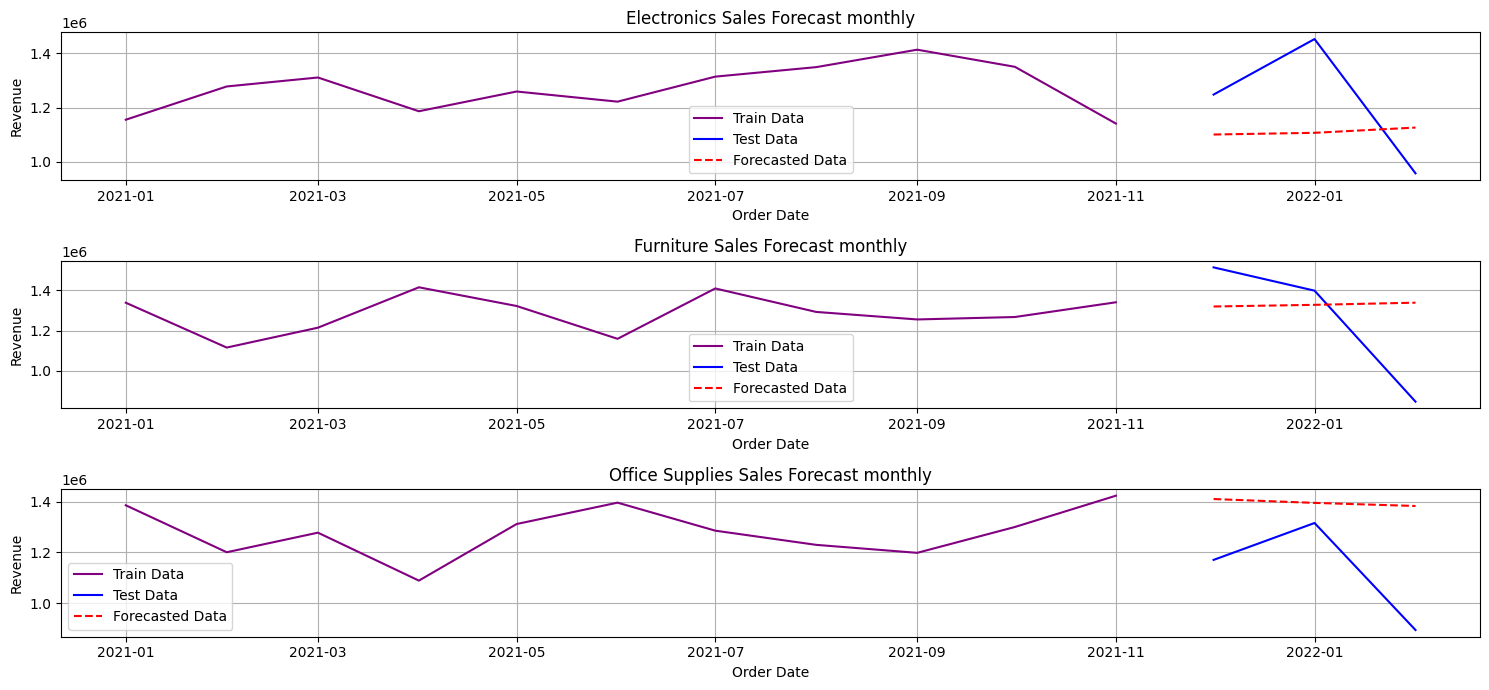

In [78]:
plt.figure(figsize=(15, 7))
# get the number of categories
num_categories = len(all_categories)

for i in range(num_categories):
    category = all_categories[i]
    plt.subplot(num_categories, 1, i+1)
    
    # plot train data
    plt.plot(monthly_sales_train_data[category]['Order Date'],
             monthly_sales_train_data[category]['Revenue'],  
             label='Actual Sales (Train Data)', 
             color='purple')
    
    # plot test data
    plt.plot(monthly_sales_test_data[category]['Order Date'],
             monthly_sales_test_data[category]['Revenue'],
             label='Actual Sales (Test Data)', 
             color='blue')
    
    # plot forecasted data
    plt.plot(monthly_sales_test_data[category]['Order Date'],
             arima_monthly_forecasts[category],
             label='Forecasted Sales', 
             color='red',
             linestyle='--')  
    
    plt.title(f'{category} Sales Forecast monthly')
    plt.xlabel('Order Date')
    plt.ylabel('Revenue')
    plt.legend(['Train Data', 'Test Data', 'Forecasted Data'])
    plt.grid(True)

plt.tight_layout()
plt.show()

### evaluate on MAE,RMSE,MAPE

In [79]:
import math
mae, rmse, mape = 0, 0, 0
arima_monthly_mape_scores = dict()

for category in all_categories:
    # get the test data for that category
    test_data = monthly_sales_test_data[category]['Revenue'].values
    # get forecast data for that category
    forecast_data = arima_monthly_forecasts[category]
    
    # calculate MAE,RMSE and MAPE
    category_mae = mean_absolute_error(test_data, forecast_data)
    category_rmse = math.sqrt(mean_squared_error(test_data, forecast_data))
    category_mape = np.mean(np.abs((test_data - forecast_data)/test_data)) * 100  
    
    # store calculated values
    mae += category_mae
    rmse += category_rmse
    mape += category_mape
    
    # Store individual category scores
    arima_monthly_mape_scores[category] = category_mape
        

# get the average
mae /= len(all_categories)
rmse /= len(all_categories)
mape /= len(all_categories)

# print results
print('MAE:', mae)
print('RMSE:', rmse)  
print('MAPE:', mape)  

MAE: 246736.9698749102
RMSE: 287103.0823061519
MAPE: 23.292469504849347


# 3. Holt-winters Monthly forecasting

In [80]:
# create a dictionary to store the train and test data
monthly_sales_train_data = dict()
monthly_sales_test_data = dict()

for category in all_categories:
    # get the datasset for each category
    category_data = revenue_by_month_category[revenue_by_month_category['Product Category']== category][['Order Date','Revenue']]
    # store the train and test set
    train_end_date = '2021-11-30' # 11 months
    monthly_sales_train_data[category] = category_data[category_data['Order Date'] <= train_end_date]
    monthly_sales_test_data[category] = category_data[category_data['Order Date'] > train_end_date]

### Build and evaluate model

In [81]:
import math
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# store the metric
mae, rmse, mape = 0,0,0
hw_monthly_mape_scores = dict()
# store the forecast
hw_forecasts = dict()

for category in all_categories:
    # build the model
    model = ExponentialSmoothing(monthly_sales_train_data[category]['Revenue'], seasonal='add', seasonal_periods=2)
    model_fit = model.fit()

    # get the number of steps
    num_steps = len(monthly_sales_test_data[category])
                    
    # Forecast sales
    forecast_data = model_fit.forecast(steps=num_steps)
    hw_forecasts[category]= forecast_data
    # get the test data
    test_data = monthly_sales_test_data[category]['Revenue'].values
    # calculate MAE,RMSE and MAPE
    category_mae = mean_absolute_error(test_data, forecast_data)
    category_rmse = math.sqrt(mean_squared_error(test_data, forecast_data))
    category_mape = np.mean(np.abs((test_data - forecast_data)/test_data)) * 100  
    
    # store calculated values
    mae += category_mae
    rmse += category_rmse
    mape += category_mape
    
    # Store individual category scores
    hw_monthly_mape_scores[category] = category_mape
   
  # get the average
mae /= len(all_categories)
rmse /= len(all_categories)
mape /= len(all_categories)

# print results
print('MAE:', mae)
print('RMSE:', rmse)  
print('MAPE:', mape)        

MAE: 188718.21353877857
RMSE: 233103.83023665004
MAPE: 18.339268316431127


C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the s

### plot results

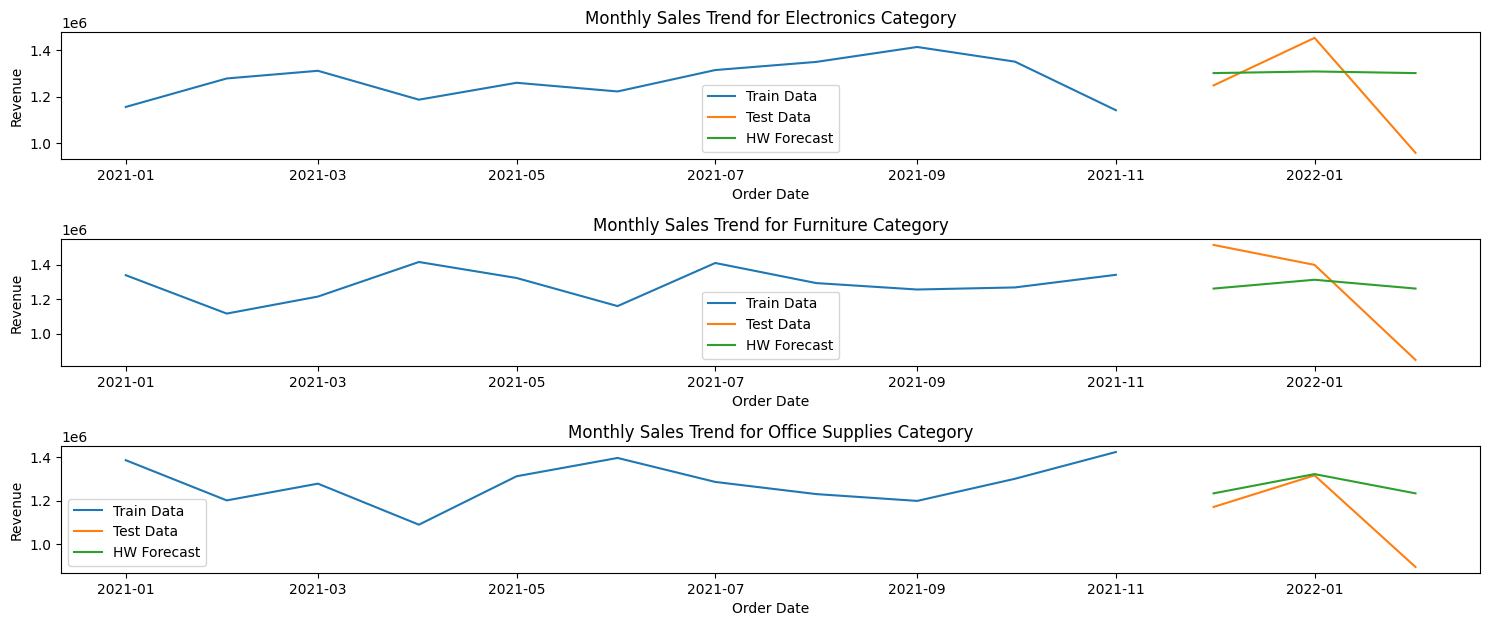

In [82]:
plt.figure(figsize=(15,8))

i = 1
for category in all_categories:
    plt.subplot(4,1,i)

    # ensure the 'Order Date' column is i datetime format
    monthly_sales_train_data[category]['Order Date'] = pd.to_datetime(monthly_sales_train_data[category]['Order Date'])
    monthly_sales_test_data[category]['Order Date'] = pd.to_datetime(monthly_sales_test_data[category]['Order Date'])

    # plot the train data
    plt.plot(
        monthly_sales_train_data[category]['Order Date'],
        monthly_sales_train_data[category]['Revenue'],
        label = 'Train Data'
    )

    # plot the test data
    plt.plot(
        monthly_sales_test_data[category]['Order Date'],
        monthly_sales_test_data[category]['Revenue'],
        label = 'Test Data'
    )

    # plot the forecasted data
    plt.plot(
        monthly_sales_test_data[category]['Order Date'],
        hw_forecasts[category],
        label = 'HW Forecast'
    )

    plt.title(f'Monthly Sales Trend for {category} Category')
    plt.xlabel('Order Date')
    plt.ylabel('Revenue')
    plt.legend(['Train Data', 'Test Data', 'HW Forecast'])

    i += 1

plt.tight_layout()
plt.show()
    


# 4. LSTM

In [91]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import math



# Initialize dictionaries to store MAPE scores
lstm_weekly_mape_scores = {}
lstm_monthly_mape_scores = {}

# prepare data for LSTM
def prepare_lstm_data(data, sequence_length=4):
    X,y = [],[]
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# train and evaluate LSTM 
def train_lstm_and_evaluate(train_data, test_data, sequence_length=4, epochs=50, batch_size=16):
    # scale data
    scaler = MinMaxScaler(feature_range=(0,1))
    train_scaled = scaler.fit_transform(train_data.reshape(-1,1))
    test_scaled = scaler.transform(test_data.reshape(-1, 1))

     # adjust sequence length if dataset is too short
    if len(train_scaled) <= sequence_length:
        sequence_length = max(1, len(train_scaled) // 2)

    # Prepare data
    X_train, y_train = prepare_lstm_data(train_scaled, sequence_length)
    X_test, y_test = prepare_lstm_data(np.concatenate((train_scaled[-sequence_length:], test_scaled)), sequence_length)

  


    # Build LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Make predictions
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_original = scaler.inverse_transform(y_test)
    y_test_original = y_test_original.flatten()
    y_pred = y_pred.flatten()

    # Calculate metrics
    mae = mean_absolute_error(y_test_original, y_pred)
    rmse = math.sqrt(mean_squared_error(y_test_original, y_pred))
    mape = np.mean(np.abs((y_test_original - y_pred) / (y_test_original+ 1e-10))) * 100

    return mae, rmse, mape, y_pred

# Loop for weekly LSTM model
print("Weekly LSTM Forecasting:")
for category in revenue_by_week_category['Product Category'].unique():
    category_data = revenue_by_week_category[revenue_by_week_category['Product Category'] == category]
    category_data.set_index('Order Date', inplace=True)
    revenue = category_data['Revenue'].values

    # Train-test split
    train_size = int(len(revenue) * 0.8)
    train, test = revenue[:train_size], revenue[train_size:]

    # Train and evaluate
    mae, rmse, mape, forecast = train_lstm_and_evaluate(train, test)

    # Store metrics
    lstm_weekly_mape_scores[category] = mape

    # Print results
    print(f"Category: {category}")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAPE: {mape:.2f}%")

# Loop for monthly LSTM model
print("\nMonthly LSTM Forecasting:")
for category in revenue_by_month_category['Product Category'].unique():
    category_data = revenue_by_month_category[revenue_by_month_category['Product Category'] == category]
    category_data.set_index('Order Date', inplace=True)
    revenue = category_data['Revenue'].values

    # Train-test split
    train_size = int(len(revenue) * 0.9)
    train, test = revenue[:train_size], revenue[train_size:]

    # Train and evaluate
    mae, rmse, mape, forecast = train_lstm_and_evaluate(train, test)

    # Store metrics
    lstm_monthly_mape_scores[category] = mape

    # Print results
    print(f"Category: {category}")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAPE: {mape:.2f}%")


Weekly LSTM Forecasting:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Category: Electronics
  MAE: 48560.86
  RMSE: 66216.30
  MAPE: 17.14%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Category: Furniture
  MAE: 44091.20
  RMSE: 50863.77
  MAPE: 14.65%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Category: Office Supplies
  MAE: 38710.44
  RMSE: 48259.05
  MAPE: 15.17%

Monthly LSTM Forecasting:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Category: Electronics
  MAE: 242609.85
  RMSE: 254975.50
  MAPE: 22.40%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Category: Furniture
  MAE: 291800.63
  RMSE: 369273.63
  MAPE: 32.91%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Category: Office Supplies
  MAE: 219019.64
  RMSE: 287157.94
  MAPE: 23.85%


In [92]:

# Calculate the average MAPE scores for each model
prophet_weekly_mape_scores['--Average--'] = np.mean(list(prophet_weekly_mape_scores.values()))
arima_weekly_mape_scores['--Average--'] = np.mean(list(arima_weekly_mape_scores.values()))
prophet_monthly_mape_scores['--Average--'] = np.mean(list(prophet_monthly_mape_scores.values()))
arima_monthly_mape_scores['--Average--'] = np.mean(list(arima_monthly_mape_scores.values()))
hw_monthly_mape_scores['--Average--'] = np.mean(list(hw_monthly_mape_scores.values()))
lstm_weekly_mape_scores['--Average--'] = np.mean(list(lstm_weekly_mape_scores.values()))
lstm_monthly_mape_scores['--Average--'] = np.mean(list(lstm_monthly_mape_scores.values()))

# Combine the scores into a DataFrame
mape_scores_df = pd.DataFrame({
    'Prophet Weekly': prophet_weekly_mape_scores,
    'ARIMA Weekly': arima_weekly_mape_scores,
    'LSTM Weekly': lstm_weekly_mape_scores,
    'Prophet Monthly': prophet_monthly_mape_scores,
    'ARIMA Monthly': arima_monthly_mape_scores,
    'ES Monthly': hw_monthly_mape_scores,
    'LSTM Monthly': lstm_monthly_mape_scores
})

# Display the DataFrame
print(mape_scores_df)


                 Prophet Weekly  ARIMA Weekly  LSTM Weekly  Prophet Monthly  \
Electronics           16.332763     43.323296    17.136324        17.874264   
Furniture             15.463112     13.887002    14.650315        27.051770   
Office Supplies       14.258438     19.791298    15.173185        27.677971   
--Average--           15.351438     25.667199    15.653275        24.201335   

                 ARIMA Monthly  ES Monthly  LSTM Monthly  
Electronics          17.711974   16.662025     22.403820  
Furniture            25.267331   23.882696     32.906885  
Office Supplies      26.898104   14.473085     23.853104  
--Average--          23.292470   18.339268     26.387936  


### Model Validation

In [93]:
from sklearn.model_selection import TimeSeriesSplit

# Perform time-series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
for category in revenue_by_week_category['Product Category'].unique():
    revenue = revenue_by_week_category[revenue_by_week_category['Product Category'] == category]['Revenue'].values
    for train_index, test_index in tscv.split(revenue):
        train, test = revenue[train_index], revenue[test_index]
        mae, rmse, mape, _ = train_lstm_and_evaluate(train, test)
        print(f"Cross-Validation Metrics for {category} (Fold {len(train)}-{len(test)}):")
        print(f"  MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Cross-Validation Metrics for Electronics (Fold 10-10):
  MAE: 32920.92, RMSE: 42233.11, MAPE: 12.60%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Cross-Validation Metrics for Electronics (Fold 20-10):
  MAE: 33696.08, RMSE: 41658.30, MAPE: 11.47%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Cross-Validation Metrics for Electronics (Fold 30-10):
  MAE: 40396.56, RMSE: 51313.73, MAPE: 13.18%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Cross-Validation Metrics for Electronics (Fold 40-10):
  MAE: 50286.29, RMSE: 62800.21, MAPE: 16.42%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Cross-Validation Metrics for Electronics (Fold 50-10):
  MAE: 39903.85, RMSE: 54284.97, MAPE: 15.88%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Cross-Validation Metrics for Furniture (Fold 10-10):
  MAE: 32132.13, RMSE: 44149.35, MAPE: 9.77%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Cross-Validation Metrics for Furniture (Fold 20-10):
  MAE: 36132.61, RMSE: 49401.12, MAPE: 11.36%
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [94]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import math

# Cross-validation for ES Monthly
print("\nExponential Smoothing (ES Monthly) Cross-Validation:")

# Initialize results dictionary
es_cv_results = {}

for category in revenue_by_month_category['Product Category'].unique():
    # Extract revenue data for the category
    revenue = revenue_by_month_category[revenue_by_month_category['Product Category'] == category]['Revenue'].values
    
    fold_metrics = [] 

    for train_index, test_index in tscv.split(revenue):
        # Split the data
        train, test = revenue[train_index], revenue[test_index]

        # Build and fit ES model
        model = ExponentialSmoothing(
            train,
            trend=None,
            seasonal='add',
            seasonal_periods=2 
        ).fit()

        # Forecast
        forecast = model.forecast(len(test))

        # Calculate metrics
        mae = mean_absolute_error(test, forecast)
        rmse = math.sqrt(mean_squared_error(test, forecast))
        mape = np.mean(np.abs((test - forecast) / test)) * 100

        # Store metrics for the fold
        fold_metrics.append({'MAE': mae, 'RMSE': rmse, 'MAPE': mape})

    # Store average metrics for the category
    avg_metrics = {
        'MAE': np.mean([fm['MAE'] for fm in fold_metrics]),
        'RMSE': np.mean([fm['RMSE'] for fm in fold_metrics]),
        'MAPE': np.mean([fm['MAPE'] for fm in fold_metrics])
    }
    es_cv_results[category] = avg_metrics

    print(f"Category: {category}")
    print(f"  MAE: {avg_metrics['MAE']:.2f}, RMSE: {avg_metrics['RMSE']:.2f}, MAPE: {avg_metrics['MAPE']:.2f}%")

print("\nCross-validation results for ES Monthly:")
print(es_cv_results)



Exponential Smoothing (ES Monthly) Cross-Validation:
Category: Electronics
  MAE: 137329.47, RMSE: 143145.82, MAPE: 11.37%
Category: Furniture
  MAE: 131629.76, RMSE: 156173.47, MAPE: 11.76%
Category: Office Supplies
  MAE: 130502.62, RMSE: 154680.30, MAPE: 11.11%

Cross-validation results for ES Monthly:
{'Electronics': {'MAE': np.float64(137329.4658193072), 'RMSE': np.float64(143145.81703383967), 'MAPE': np.float64(11.37347861886035)}, 'Furniture': {'MAE': np.float64(131629.76483091695), 'RMSE': np.float64(156173.47350387226), 'MAPE': np.float64(11.75612934965572)}, 'Office Supplies': {'MAE': np.float64(130502.62209700778), 'RMSE': np.float64(154680.30466502128), 'MAPE': np.float64(11.110427066409153)}}


C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shehan\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Shehan\AppData\Roamin

## Final Recommendations

### Weekly Forecasting selected model= LSTM (Best in class performance with the lowest MAPE values across all categories.Strong generalization and abilty to capture complex patterns for short term planning)

### Monthly Forecasting selected model= Exponential Smoothing(ES) monthly metrics(lowest MAPE values and simplicity and computational effciency make it for long term forecasting)